In [63]:
# Importing some libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import re
from sklearn.metrics import accuracy_score


In [64]:
## Read the data
train_df = pd.read_csv('train_ml.csv', index_col=0)
test_df = pd.read_csv('test_ml.csv', index_col=0)

In [65]:
train_df.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,updates,personal,promotions,forums,purchases,travel,spam,social
0,"Mon, 15 Oct 2018 08:03:09 +0000 (UTC)",researchgatemail,net,0,0,multipart/alternative,4,28,0,1,47.0,25556,0,1,0,0,0,0,0,1
1,"Thu, 17 Apr 2014 09:12:33 -0700 (PDT)",no-ip,com,0,0,multipart/alternative,6,32,0,0,46.0,19930,1,1,0,0,0,0,0,0
2,"Thu, 27 Oct 2016 01:36:28 +0000",mail,goodreads.com,0,0,multipart/mixed,0,0,0,0,21.0,4,0,1,0,0,0,0,0,1
3,"Fri, 16 Oct 2020 08:06:31 +0000 (GMT)",insideapple,apple.com,0,0,multipart/alternative,108,171,0,0,52.0,96568,0,0,1,0,0,0,0,0
4,"Thu, 02 Jul 2015 10:16:46 +0000",twitter,com,0,0,multipart/alternative,20,166,0,0,81.0,95131,0,1,0,0,0,0,0,1


In [66]:
train_df.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,updates,personal,promotions,forums,purchases,travel,spam,social
0,"Mon, 15 Oct 2018 08:03:09 +0000 (UTC)",researchgatemail,net,0,0,multipart/alternative,4,28,0,1,47.0,25556,0,1,0,0,0,0,0,1
1,"Thu, 17 Apr 2014 09:12:33 -0700 (PDT)",no-ip,com,0,0,multipart/alternative,6,32,0,0,46.0,19930,1,1,0,0,0,0,0,0
2,"Thu, 27 Oct 2016 01:36:28 +0000",mail,goodreads.com,0,0,multipart/mixed,0,0,0,0,21.0,4,0,1,0,0,0,0,0,1
3,"Fri, 16 Oct 2020 08:06:31 +0000 (GMT)",insideapple,apple.com,0,0,multipart/alternative,108,171,0,0,52.0,96568,0,0,1,0,0,0,0,0
4,"Thu, 02 Jul 2015 10:16:46 +0000",twitter,com,0,0,multipart/alternative,20,166,0,0,81.0,95131,0,1,0,0,0,0,0,1


In [67]:
test_df.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,"Thu, 13 Jul 2017 08:55:57 +0000",twitter,com,0,0,multipart/alternative,7,56,0,0,67.0,36243
1,"Sun, 30 Sep 2018 14:42:12 +0000",mailer,netflix.com,0,0,multipart/alternative,5,33,0,0,27.0,27015
2,"Mon, 13 Feb 2017 10:47:00 +0530",iiitd,ac.in,0,0,text/plain,0,2,1,0,22.0,788
3,"Thu, 16 Jun 2016 09:56:23 +0000",twitter,com,0,0,multipart/alternative,8,53,0,0,79.0,39504
4,"Mon, 18 Apr 2016 01:51:59 +0530",iiitd,ac.in,0,0,multipart/mixed,0,0,0,0,24.0,178773


In [68]:
train_df.describe()

,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,updates,personal,promotions,forums,purchases,travel,spam,social
count,39671.000000,39671.000000,39671.000000,39671.000000,39671.000000,39671.000000,39660.000000,3.967100e+04,39671.000000,39671.000000,39671.000000,39671.000000,39671.000000,39671.000000,39671.000000,39671.000000
mean,0.378967,0.002974,9.806332,36.731088,0.395755,0.102317,51.442032,2.321781e+05,0.362406,0.809609,0.199768,0.155807,0.008293,0.002521,0.003832,0.100955
std,2.530353,0.054458,440.393286,144.379127,0.489018,0.303068,34.142227,2.251044e+06,0.480701,0.392614,0.399831,0.362676,0.090690,0.050144,0.061781,0.301273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,4.500000,0.000000,0.000000,31.000000,4.903000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,18.000000,0.000000,0.000000,43.000000,2.000500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,9.000000,47.000000,1.000000,0.000000,63.000000,4.800100e+04,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,155.000000,1.000000,83480.000000,21540.000000,1.000000,1.000000,528.000000,7.438108e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
train_df.groupby(['tld','org'])[['updates','personal','promotions','forums','purchases','travel','spam','social']].mean()

,,updates,personal,promotions,forums,purchases,travel,spam,social
tld,org,,,,,,,,
21cf.com,digital,0.500000,1.000000,0.500000,0.0,0.0,0.0,0.0,0.0
33mail.com,mailer1,1.000000,0.058824,0.000000,0.0,0.0,0.0,0.0,0.0
4shared.com,mx2,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Apple.com,InsideApple,0.545455,0.818182,0.454545,0.0,0.0,0.0,0.0,0.0
BRASSRING.COM,TRM,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
wix.com,i,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0
xerox.com,xrce,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0
xoom.com,messages,0.900000,0.733333,0.466667,0.0,0.0,0.0,0.0,0.0


In [70]:
train_df.shape

(39671, 20)

In [71]:
train_df.dtypes.value_counts()

int64      15
object      4
float64     1
dtype: int64

In [72]:
train_df.dtypes

date                 object
org                  object
tld                  object
ccs                   int64
bcced                 int64
mail_type            object
images                int64
urls                  int64
salutations           int64
designation           int64
chars_in_subject    float64
chars_in_body         int64
updates               int64
personal              int64
promotions            int64
forums                int64
purchases             int64
travel                int64
spam                  int64
social                int64
dtype: object

In [73]:
# Splitting the data into real features and predictions
def split_X_y(Xa):
    return Xa.drop(['updates','personal','promotions','forums','purchases','travel','spam','social'],axis=1), Xa[['updates','personal','promotions','forums','purchases','travel','spam','social']]


In [74]:
X,y=split_X_y(train_df.copy())

In [75]:
# Listing the columns
columns=list(X.columns)
print(columns)

['date', 'org', 'tld', 'ccs', 'bcced', 'mail_type', 'images', 'urls', 'salutations', 'designation', 'chars_in_subject', 'chars_in_body']


In [76]:
# Categorical and numericals features
categorical_features=X.select_dtypes(include=['object','category']).columns.tolist()
numerical_features=X.select_dtypes(exclude=['object','category']).columns.tolist()

In [77]:
print(' columns ', columns)
print('-------------')
print( 'categorical features', categorical_features)
print('-------------')
print('nulerical_features', numerical_features)

 columns  ['date', 'org', 'tld', 'ccs', 'bcced', 'mail_type', 'images', 'urls', 'salutations', 'designation', 'chars_in_subject', 'chars_in_body']
-------------
categorical features ['date', 'org', 'tld', 'mail_type']
-------------
nulerical_features ['ccs', 'bcced', 'images', 'urls', 'salutations', 'designation', 'chars_in_subject', 'chars_in_body']


In [78]:
for col in categorical_features:
    print(col,'\n','****************','\n',X[col].value_counts())
    print('*****************************')

date 
 **************** 
 Sat, 04 May 2019 18:17:01 -0700    13
Sun, 03 Nov 2019 08:51:24 -0800    12
Tue, 22 Sep 2020 03:28:22 -0700    12
Tue, 04 Jun 2019 05:05:20 -0700    12
Sat, 06 Jun 2020 08:09:28 -0700    11
                                   ..
Tue, 25 Jun 2019 14:00:06 -0700     1
Tue, 28 Mar 2017 17:41:59 +0000     1
Mon, 22 Oct 2018 19:30:29 -0700     1
Fri, 21 Sep 2018 20:23:20 +0000     1
Thu, 27 Apr 2017 13:15:10 +0530     1
Name: date, Length: 38122, dtype: int64
*****************************
org 
 **************** 
 iiitd           8934
google          2201
usebackpack     1699
amazon          1523
quora           1241
                ... 
plagscan           1
rootwork           1
speakingtree       1
diguy              1
socialalpha        1
Name: org, Length: 973, dtype: int64
*****************************
tld 
 **************** 
 com           17682
ac.in          8996
in             1818
org            1739
fr             1044
              ...  
cat               

In [79]:
for col in columns:
    print(col,'----------------',X[col].isnull().sum())

date ---------------- 0
org ---------------- 1677
tld ---------------- 1679
ccs ---------------- 0
bcced ---------------- 0
mail_type ---------------- 98
images ---------------- 0
urls ---------------- 0
salutations ---------------- 0
designation ---------------- 0
chars_in_subject ---------------- 11
chars_in_body ---------------- 0


In [80]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, LabelEncoder

In [81]:
## PREPROCESSING

# Changing  mail_type columns in more columns
mail_type=train_df['mail_type'].unique().tolist()

M=[]
for l in mail_type:
    a="".join(str(l).split(" ")).lower()
    M+=(a.split('/'))
keys=set(M)
    

# put all the strings in lower case
def standardisation(data):
    for col in data.select_dtypes(include=['object','category']).columns.tolist():
        data[col]=data[col].str.lower()



    
def new_variables(data):
    m=data.shape[0]
    #L=train_df['mail_type'].unique().tolist()
   
    #print(keys)
    newColumns={}
    for key in keys:
        temp=[]
        for i in range(m):
            if key in list( "".join(str(data['mail_type'].iloc[i]).split(" ")).split('/')):
                temp.append(1)
            else:
                temp.append(0)
        newColumns[key]= temp
    for key in newColumns.keys():
        data[key]=newColumns[key]
        
    

In [82]:
days=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Sep','Oct','Nov','Dec']
def day_parse(L):
    for day in days:
        if day in L:
            return day
   
    
def month_parse(L):
    for month in months:
        if month in L:
            return month

    
def time_parse(L):
    M="".join(L.split(" "))
    plus=0;minus=0
    for i in range(len(M)):
        if M[i]==':':
            a=i
        if M[i]=='+' and (M[i-1] in ['0','1','2','3','4','5','6','7','8','9']) and (M[i+1] in ['0','1','2','3','4','5','6','7','8','9']):
            plus=i
        if M[i]=='-' and (M[i-1] in ['0','1','2','3','4','5','6','7','8','9']) and (M[i+1] in ['0','1','2','3','4','5','6','7','8','9']):
            minus=i

        
        
    #a=L.find(':')
    #print(L[a-2:a]+L[a+1:a+3])
    time1=int(M[a-2:a]+M[a+1:a+3])
    
    
    if plus!=0:
        time2=int(M[plus+1:plus+5])
        time=(time1+time2)%2400
    elif minus!=0:
        #print(L)
        time2=int(M[minus+1:minus+5])
        time=(time1-time2)%2400
    elif plus==0 and minus==0:
        time=time1
        
    return time

def year_parse(L):
    M=" ".join(L.split(" "))
    #print(M)
    try :
        return int(re.findall('[0-9][0-9][0-9][0-9]',M)[0])
    except:
        return np.nan
    

def number_date_parse(L):
    M=" ".join(L.split(" "))
    #print(M)
    try :
        return int(re.findall('[0-9][0-9]',M)[0])
    except:
        return np.nan

In [83]:
def date_process(data1):
    data=data1.copy()
    data['day']=data['date'].apply(day_parse)
    data['month']=data['date'].apply(month_parse)
    data['time']=data['date'].apply(time_parse)
    data['year']=data['date'].apply(year_parse)
    data['number_date']=data['date'].apply(number_date_parse)
    return data

In [84]:
## Date preprocessing
X=date_process(X)

In [85]:
# Dummies creation
def create_dummies(data):
    return pd.get_dummies(data, columns=['month','day'], prefix='', prefix_sep='')
    

In [86]:
X=create_dummies(X)

In [87]:
average_url_size=1
def ratio_features(data):
    data['urls_ratio']=data['urls']*average_url_size/data['chars_in_body']
    data['images_ratio']=data['images']/data['chars_in_body']
    data['chars_in_subject_ratio']=data['chars_in_subject']/data['chars_in_body']
    data['salu_design_']=data['salutations']*data['designation']
    

In [88]:
ratio_features(X)

In [89]:
X.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,...,Mon,Sat,Sun,Thu,Tue,Wed,urls_ratio,images_ratio,chars_in_subject_ratio,salu_design_
0,"Mon, 15 Oct 2018 08:03:09 +0000 (UTC)",researchgatemail,net,0,0,multipart/alternative,4,28,0,1,...,1,0,0,0,0,0,0.001096,0.000157,0.001839,0
1,"Thu, 17 Apr 2014 09:12:33 -0700 (PDT)",no-ip,com,0,0,multipart/alternative,6,32,0,0,...,0,0,0,1,0,0,0.001606,0.000301,0.002308,0
2,"Thu, 27 Oct 2016 01:36:28 +0000",mail,goodreads.com,0,0,multipart/mixed,0,0,0,0,...,0,0,0,1,0,0,0.000000,0.000000,5.250000,0
3,"Fri, 16 Oct 2020 08:06:31 +0000 (GMT)",insideapple,apple.com,0,0,multipart/alternative,108,171,0,0,...,0,0,0,0,0,0,0.001771,0.001118,0.000538,0
4,"Thu, 02 Jul 2015 10:16:46 +0000",twitter,com,0,0,multipart/alternative,20,166,0,0,...,0,0,0,1,0,0,0.001745,0.000210,0.000851,0


In [90]:
#Strings in lower case
standardisation(X)

print(X['mail_type'].value_counts())

multipart/alternative    28196
text/html                 5595
multipart/mixed           3405
text/plain                1397
multipart/related          902
text/html                   40
multipart/signed            23
multipart/report            12
text/calendar                2
multipart/idm                1
Name: mail_type, dtype: int64


In [91]:
# Changing  mail_type columns in more columns
new_variables(X)

In [92]:
X.shape

(39671, 49)

In [93]:
# Dropping useless features

def dropping(data, cols=['date','mail_type','org','tld','nan']):
    data.drop(cols, axis=1,inplace=True)
dropping(X,['date','mail_type','nan'])

In [94]:
X.head()

,org,tld,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,...,calendar,report,alternative,signed,related,mixed,plain,multipart,html,idm
0,researchgatemail,net,0,0,4,28,0,1,47.0,25556,...,0,0,1,0,0,0,0,1,0,0
1,no-ip,com,0,0,6,32,0,0,46.0,19930,...,0,0,1,0,0,0,0,1,0,0
2,mail,goodreads.com,0,0,0,0,0,0,21.0,4,...,0,0,0,0,0,1,0,1,0,0
3,insideapple,apple.com,0,0,108,171,0,0,52.0,96568,...,0,0,1,0,0,0,0,1,0,0
4,twitter,com,0,0,20,166,0,0,81.0,95131,...,0,0,1,0,0,0,0,1,0,0


In [95]:
X.columns

Index(['org', 'tld', 'ccs', 'bcced', 'images', 'urls', 'salutations',
       'designation', 'chars_in_subject', 'chars_in_body', 'time', 'year',
       'number_date', 'Apr', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'urls_ratio', 'images_ratio', 'chars_in_subject_ratio', 'salu_design_',
       'text', 'calendar', 'report', 'alternative', 'signed', 'related',
       'mixed', 'plain', 'multipart', 'html', 'idm'],
      dtype='object')

In [96]:
new_df=X.join(y)


In [97]:
new_df.columns

Index(['org', 'tld', 'ccs', 'bcced', 'images', 'urls', 'salutations',
       'designation', 'chars_in_subject', 'chars_in_body', 'time', 'year',
       'number_date', 'Apr', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'urls_ratio', 'images_ratio', 'chars_in_subject_ratio', 'salu_design_',
       'text', 'calendar', 'report', 'alternative', 'signed', 'related',
       'mixed', 'plain', 'multipart', 'html', 'idm', 'updates', 'personal',
       'promotions', 'forums', 'purchases', 'travel', 'spam', 'social'],
      dtype='object')

<AxesSubplot:>

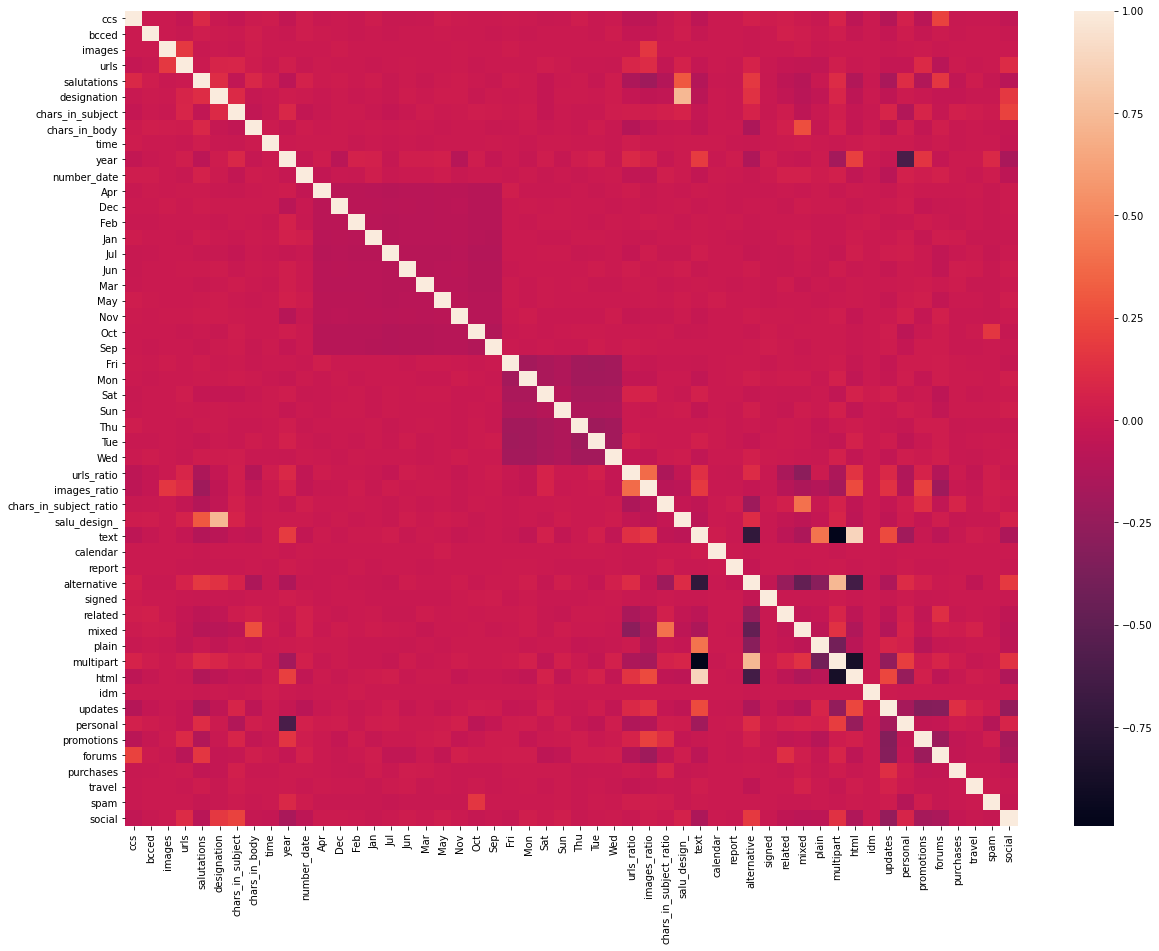

In [98]:
plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr())


>Threshold=0.00, Features=44
>Threshold=0.01, Features=37
>Threshold=0.02, Features=37
>Threshold=0.03, Features=36
>Threshold=0.04, Features=35
>Threshold=0.05, Features=35
>Threshold=0.06, Features=34
>Threshold=0.07, Features=29
>Threshold=0.08, Features=24
>Threshold=0.09, Features=23
>Threshold=0.10, Features=19
>Threshold=0.11, Features=19
>Threshold=0.12, Features=19
>Threshold=0.13, Features=16
>Threshold=0.14, Features=14
>Threshold=0.15, Features=11
>Threshold=0.16, Features=11
>Threshold=0.17, Features=11
>Threshold=0.18, Features=11
>Threshold=0.19, Features=11
>Threshold=0.20, Features=11
>Threshold=0.21, Features=10
>Threshold=0.22, Features=10
>Threshold=0.23, Features=10
>Threshold=0.24, Features=9
>Threshold=0.25, Features=9
>Threshold=0.26, Features=9
>Threshold=0.27, Features=9
>Threshold=0.28, Features=9
>Threshold=0.29, Features=9
>Threshold=0.30, Features=9
>Threshold=0.31, Features=9
>Threshold=0.32, Features=9
>Threshold=0.33, Features=9
>Threshold=0.34, Feature

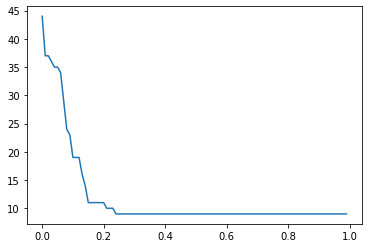

In [99]:
from sklearn.feature_selection import VarianceThreshold

# define thresholds to check
thresholds = np.arange(0.0, 1, 0.010)
# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X.select_dtypes(exclude=['object','category']))
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
# plot the threshold vs the number of selected features
plt.plot(thresholds, results)
plt.show()

In [100]:
variance_threshold=0.01
X_var=X.copy()
def variance_selector(data,threshold=variance_threshold):
    if threshold==0:
        return data
    else:
        selector = VarianceThreshold(threshold)
        col_1=X_var.select_dtypes(exclude=['number']).columns.tolist()
        selector.fit(    X_var[X_var.select_dtypes(include=['number']).columns]) 
        print( X_var.columns[selector.get_support(indices=True)] )
        return  data[ list(set(col_1+X_var.columns[selector.get_support(indices=True)].tolist())) ] 
      #  return data.loc[:, data.std(axis=0) > threshold]

X_sel=variance_selector(X)


Index(['org', 'ccs', 'bcced', 'images', 'urls', 'salutations', 'designation',
       'chars_in_subject', 'chars_in_body', 'time', 'year', 'number_date',
       'Apr', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'urls_ratio', 'images_ratio',
       'chars_in_subject_ratio', 'calendar', 'alternative', 'signed',
       'related', 'mixed', 'plain'],
      dtype='object')


In [101]:
#X_sel=X.copy()

In [102]:
X.shape

(39671, 46)

In [103]:
X_sel.shape

(39671, 38)

In [104]:
X_sel.head()

,tld,Nov,Mar,images_ratio,Fri,Sun,bcced,Mon,mixed,time,...,Apr,Jan,org,Jun,chars_in_body,Oct,year,Sat,alternative,urls_ratio
0,net,0,0,0.000157,0,0,0,1,0,309,...,0,0,researchgatemail,0,25556,1,2018.0,0,1,0.001096
1,com,0,0,0.000301,0,0,0,0,0,533,...,1,0,no-ip,0,19930,0,2014.0,0,1,0.001606
2,goodreads.com,0,0,0.000000,0,0,0,0,1,1228,...,0,0,mail,0,4,1,2016.0,0,0,0.000000
3,apple.com,0,0,0.001118,1,0,0,0,0,631,...,0,0,insideapple,0,96568,1,2020.0,0,1,0.001771
4,com,0,0,0.000210,0,0,0,0,0,1646,...,0,0,twitter,0,95131,0,2015.0,0,1,0.001745


In [105]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier,OutputCodeClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, PowerTransformer, MaxAbsScaler,QuantileTransformer,Normalizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.mixture import GaussianMixture

In [106]:
def impute(inner_model):
    # Obtaining the new features
    categorical_features=X_sel.select_dtypes(include=['object','category']).columns.tolist()
    numerical_features=X_sel.select_dtypes(exclude=['object','category']).columns.tolist()
    
    # creating the pipeline of the prepocessing
    numerical_pipeline=Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),
                                       #('quadratic',PolynomialFeatures(2)),
                                       
                                       
                                         ('standard',RobustScaler()),
                                       ('pca',PCA(n_components='mle')),
                                      ])

    categorical_pipeline=Pipeline(steps=[('imputation',SimpleImputer(strategy='most_frequent')),
                                         
                                        ('oneHotencode',OneHotEncoder(handle_unknown='ignore') ),
                                         
                                        ])

    preparation=ColumnTransformer(transformers=[('categorical',categorical_pipeline, categorical_features),
                                               ('numerical',numerical_pipeline,numerical_features)])
    
    model= Pipeline(steps=[('preparation', preparation),
                              ('model', OneVsRestClassifier(  inner_model ) )]) 
    return model


In [107]:
# The best for the moment

# 
#XGBClassifier(max_depth=9,
 #min_child_weight=1,gamma=0.3, subsample=1, colsample_bytree=0.8,reg_alpha=0.01,learning_rate= 0.2,n_estimators= 300) 

    #Origin 1 
#OneVsRestClassifier(XGBClassifier( max_depth=9,
 #min_child_weight=1, gamma=0.3, subsample=1, colsample_bytree=0.8,reg_alpha=0.01,learning_rate= 0.2,n_estimators= 300)

#'model__estimator__max_depth': 6, 'model__estimator__learning_rate': 0.25, 'model__estimator__gamma': 0.1, 'model__estimator__colsample_bytree': 0.5

#XGBClassifier( max_depth=9,
 #min_child_weight=1, gamma=0.3, subsample=1, colsample_bytree=0.8,reg_alpha=0.01,learning_rate= 0.2,n_estimators= 300)
    
# 3 fevrier
#XGBClassifier(max_depth= 9, min_child_weight= 1 , gamma= 0.4, colsample_bytree= 0.7, subsample= 1,
#reg_alpha= 0.01, learning_rate= 0.2, n_estimators= 350)



In [108]:
from datetime import datetime

In [109]:
!pip install catboost

In [110]:
from catboost import CatBoostClassifier

In [111]:
# a list of model that will be used 
#XGBClassifier(max_depth= 9, min_child_weight= 1 , gamma= 0.4, colsample_bytree= 0.7, subsample= 1, 
                         #   reg_alpha= 0.0001, learning_rate= 0.2, n_estimators= 350)
inner_models=[CatBoostClassifier( 
    learning_rate=0.2,custom_loss="Logloss")]


In [112]:

# Splitting in train and test set
X_train, X_test, y_train, y_test = train_test_split(X_sel, y)

In [113]:
#file=open("models_estimation.txt","a")    
for inner_model in inner_models:
    model=impute(inner_model)

    

    model.fit(X_train, y_train)

    print("--------------------------------------------------------------------------")
    print("Date: ",datetime.now())
    print("Variance threshold: ",variance_threshold)
    print("Model name: ", type(inner_model).__name__)
    print("Model parameters: ", inner_model.get_params())
    # Printing model score
    model_train_score=model.score(X_train, y_train)
    model_test_score=model.score(X_test, y_test)
    model_train_logLoss=log_loss(y_train,model.predict_proba(X_train))
    model_test_logLoss=log_loss(y_test,model.predict_proba(X_test))
    print("Model score on the train set : %.2f" % model_train_score)
    print("Model score on the test set : %.2f" % model_test_score)

    #Printing model log score 
    print("Model log loss on the train set: ", model_train_logLoss)
    print("Model log loss on the test set: ",model_test_logLoss )
    print("--------------------------------------------------------------------------")
    
    """file.write("--------------------------------------------------------------------------\r\n")
    file.write("Date: {}\r\n".format(datetime.now()))
    file.write("Variance threshold: {}\r\n".format(variance_threshold) )
    file.write("Model name: {}\r\n".format(type(inner_model).__name__))
    file.write("Model parameters: {}\r\n".format( inner_model.get_params()))
    file.write("Model score on the train set : {}\r\n".format(model.score(X_train, y_train)))
    file.write("Model score on the test set : {}\r\n".format(model.score(X_test, y_test)))
    file.write("Model log loss on the train set: {}\r\n".format(log_loss(y_train,model.predict_proba(X_train))))
    file.write("Model log loss on the test set: {}\r\n".format(log_loss(y_test,model.predict_proba(X_test))))
    file.write("--------------------------------------------------------------------------\r\n")
file.close()"""
    

0:	learn: 0.5569445	total: 28.2ms	remaining: 28.2s
1:	learn: 0.4885031	total: 52.9ms	remaining: 26.4s
2:	learn: 0.4533656	total: 77.5ms	remaining: 25.8s
3:	learn: 0.4299664	total: 102ms	remaining: 25.4s
4:	learn: 0.4181151	total: 128ms	remaining: 25.4s
5:	learn: 0.4044103	total: 155ms	remaining: 25.6s
6:	learn: 0.3922114	total: 177ms	remaining: 25.2s
7:	learn: 0.3830610	total: 200ms	remaining: 24.8s
8:	learn: 0.3744322	total: 227ms	remaining: 25s
9:	learn: 0.3661143	total: 261ms	remaining: 25.8s
10:	learn: 0.3587191	total: 290ms	remaining: 26s
11:	learn: 0.3547351	total: 315ms	remaining: 25.9s
12:	learn: 0.3508342	total: 340ms	remaining: 25.8s
13:	learn: 0.3459076	total: 365ms	remaining: 25.7s
14:	learn: 0.3423844	total: 389ms	remaining: 25.5s
15:	learn: 0.3392894	total: 412ms	remaining: 25.4s
16:	learn: 0.3354765	total: 437ms	remaining: 25.2s
17:	learn: 0.3320454	total: 462ms	remaining: 25.2s
18:	learn: 0.3289272	total: 498ms	remaining: 25.7s
19:	learn: 0.3259398	total: 526ms	remainin

163:	learn: 0.1865233	total: 5.16s	remaining: 26.3s
164:	learn: 0.1864291	total: 5.18s	remaining: 26.2s
165:	learn: 0.1861500	total: 5.21s	remaining: 26.2s
166:	learn: 0.1857842	total: 5.23s	remaining: 26.1s
167:	learn: 0.1851918	total: 5.26s	remaining: 26s
168:	learn: 0.1848470	total: 5.28s	remaining: 26s
169:	learn: 0.1845946	total: 5.3s	remaining: 25.9s
170:	learn: 0.1842074	total: 5.33s	remaining: 25.8s
171:	learn: 0.1840480	total: 5.35s	remaining: 25.8s
172:	learn: 0.1839896	total: 5.38s	remaining: 25.7s
173:	learn: 0.1838890	total: 5.41s	remaining: 25.7s
174:	learn: 0.1835795	total: 5.43s	remaining: 25.6s
175:	learn: 0.1832901	total: 5.45s	remaining: 25.5s
176:	learn: 0.1828237	total: 5.48s	remaining: 25.5s
177:	learn: 0.1824878	total: 5.5s	remaining: 25.4s
178:	learn: 0.1824014	total: 5.53s	remaining: 25.4s
179:	learn: 0.1821943	total: 5.55s	remaining: 25.3s
180:	learn: 0.1818207	total: 5.58s	remaining: 25.2s
181:	learn: 0.1815519	total: 5.61s	remaining: 25.2s
182:	learn: 0.1811

330:	learn: 0.1472620	total: 9.63s	remaining: 19.5s
331:	learn: 0.1472136	total: 9.65s	remaining: 19.4s
332:	learn: 0.1470809	total: 9.67s	remaining: 19.4s
333:	learn: 0.1469797	total: 9.7s	remaining: 19.3s
334:	learn: 0.1469552	total: 9.72s	remaining: 19.3s
335:	learn: 0.1469158	total: 9.74s	remaining: 19.3s
336:	learn: 0.1465826	total: 9.77s	remaining: 19.2s
337:	learn: 0.1464355	total: 9.8s	remaining: 19.2s
338:	learn: 0.1462765	total: 9.82s	remaining: 19.2s
339:	learn: 0.1461146	total: 9.86s	remaining: 19.1s
340:	learn: 0.1460903	total: 9.89s	remaining: 19.1s
341:	learn: 0.1460173	total: 9.91s	remaining: 19.1s
342:	learn: 0.1459932	total: 9.94s	remaining: 19s
343:	learn: 0.1457832	total: 9.96s	remaining: 19s
344:	learn: 0.1455177	total: 9.99s	remaining: 19s
345:	learn: 0.1454942	total: 10s	remaining: 18.9s
346:	learn: 0.1454553	total: 10.1s	remaining: 19s
347:	learn: 0.1454321	total: 10.1s	remaining: 18.9s
348:	learn: 0.1453434	total: 10.1s	remaining: 18.9s
349:	learn: 0.1451637	to

491:	learn: 0.1260846	total: 13.8s	remaining: 14.2s
492:	learn: 0.1258966	total: 13.8s	remaining: 14.2s
493:	learn: 0.1258819	total: 13.8s	remaining: 14.1s
494:	learn: 0.1258476	total: 13.8s	remaining: 14.1s
495:	learn: 0.1258332	total: 13.9s	remaining: 14.1s
496:	learn: 0.1258093	total: 13.9s	remaining: 14s
497:	learn: 0.1256677	total: 13.9s	remaining: 14s
498:	learn: 0.1256534	total: 13.9s	remaining: 14s
499:	learn: 0.1255956	total: 13.9s	remaining: 13.9s
500:	learn: 0.1252407	total: 14s	remaining: 13.9s
501:	learn: 0.1252167	total: 14s	remaining: 13.9s
502:	learn: 0.1252024	total: 14s	remaining: 13.8s
503:	learn: 0.1249163	total: 14s	remaining: 13.8s
504:	learn: 0.1249017	total: 14.1s	remaining: 13.8s
505:	learn: 0.1247147	total: 14.1s	remaining: 13.7s
506:	learn: 0.1246809	total: 14.1s	remaining: 13.7s
507:	learn: 0.1246670	total: 14.1s	remaining: 13.7s
508:	learn: 0.1246533	total: 14.1s	remaining: 13.6s
509:	learn: 0.1244342	total: 14.2s	remaining: 13.6s
510:	learn: 0.1244195	tota

651:	learn: 0.1105129	total: 17.5s	remaining: 9.35s
652:	learn: 0.1104906	total: 17.5s	remaining: 9.32s
653:	learn: 0.1103830	total: 17.6s	remaining: 9.29s
654:	learn: 0.1102661	total: 17.6s	remaining: 9.26s
655:	learn: 0.1102562	total: 17.6s	remaining: 9.23s
656:	learn: 0.1102400	total: 17.6s	remaining: 9.2s
657:	learn: 0.1102305	total: 17.7s	remaining: 9.18s
658:	learn: 0.1102208	total: 17.7s	remaining: 9.14s
659:	learn: 0.1099779	total: 17.7s	remaining: 9.12s
660:	learn: 0.1099547	total: 17.7s	remaining: 9.09s
661:	learn: 0.1099452	total: 17.7s	remaining: 9.06s
662:	learn: 0.1097962	total: 17.8s	remaining: 9.03s
663:	learn: 0.1097860	total: 17.8s	remaining: 9s
664:	learn: 0.1095046	total: 17.8s	remaining: 8.98s
665:	learn: 0.1092759	total: 17.8s	remaining: 8.95s
666:	learn: 0.1091737	total: 17.9s	remaining: 8.92s
667:	learn: 0.1090893	total: 17.9s	remaining: 8.89s
668:	learn: 0.1088517	total: 17.9s	remaining: 8.86s
669:	learn: 0.1088422	total: 17.9s	remaining: 8.83s
670:	learn: 0.10

810:	learn: 0.0978696	total: 22.1s	remaining: 5.15s
811:	learn: 0.0977058	total: 22.1s	remaining: 5.12s
812:	learn: 0.0976572	total: 22.2s	remaining: 5.1s
813:	learn: 0.0976501	total: 22.2s	remaining: 5.08s
814:	learn: 0.0976071	total: 22.3s	remaining: 5.05s
815:	learn: 0.0975888	total: 22.3s	remaining: 5.03s
816:	learn: 0.0975617	total: 22.3s	remaining: 5s
817:	learn: 0.0974355	total: 22.4s	remaining: 4.97s
818:	learn: 0.0973532	total: 22.4s	remaining: 4.95s
819:	learn: 0.0973406	total: 22.4s	remaining: 4.92s
820:	learn: 0.0973335	total: 22.5s	remaining: 4.9s
821:	learn: 0.0972097	total: 22.5s	remaining: 4.88s
822:	learn: 0.0971920	total: 22.6s	remaining: 4.86s
823:	learn: 0.0971850	total: 22.6s	remaining: 4.83s
824:	learn: 0.0971087	total: 22.6s	remaining: 4.8s
825:	learn: 0.0970808	total: 22.7s	remaining: 4.78s
826:	learn: 0.0970738	total: 22.7s	remaining: 4.75s
827:	learn: 0.0970669	total: 22.7s	remaining: 4.72s
828:	learn: 0.0970130	total: 22.8s	remaining: 4.7s
829:	learn: 0.09691

974:	learn: 0.0880380	total: 27.3s	remaining: 701ms
975:	learn: 0.0879419	total: 27.4s	remaining: 673ms
976:	learn: 0.0879323	total: 27.4s	remaining: 645ms
977:	learn: 0.0879271	total: 27.4s	remaining: 617ms
978:	learn: 0.0877652	total: 27.4s	remaining: 589ms
979:	learn: 0.0876183	total: 27.5s	remaining: 561ms
980:	learn: 0.0876123	total: 27.5s	remaining: 533ms
981:	learn: 0.0874046	total: 27.5s	remaining: 504ms
982:	learn: 0.0873192	total: 27.5s	remaining: 476ms
983:	learn: 0.0873070	total: 27.6s	remaining: 448ms
984:	learn: 0.0872820	total: 27.6s	remaining: 420ms
985:	learn: 0.0872768	total: 27.6s	remaining: 392ms
986:	learn: 0.0872717	total: 27.6s	remaining: 364ms
987:	learn: 0.0872667	total: 27.7s	remaining: 336ms
988:	learn: 0.0871708	total: 27.7s	remaining: 308ms
989:	learn: 0.0871657	total: 27.7s	remaining: 280ms
990:	learn: 0.0870945	total: 27.8s	remaining: 252ms
991:	learn: 0.0870165	total: 27.8s	remaining: 224ms
992:	learn: 0.0870113	total: 27.8s	remaining: 196ms
993:	learn: 

136:	learn: 0.0738375	total: 3.99s	remaining: 25.2s
137:	learn: 0.0738009	total: 4.02s	remaining: 25.1s
138:	learn: 0.0737504	total: 4.04s	remaining: 25s
139:	learn: 0.0734025	total: 4.08s	remaining: 25s
140:	learn: 0.0732800	total: 4.1s	remaining: 25s
141:	learn: 0.0731996	total: 4.13s	remaining: 24.9s
142:	learn: 0.0730378	total: 4.15s	remaining: 24.9s
143:	learn: 0.0729370	total: 4.18s	remaining: 24.9s
144:	learn: 0.0726156	total: 4.21s	remaining: 24.8s
145:	learn: 0.0723912	total: 4.23s	remaining: 24.8s
146:	learn: 0.0720745	total: 4.26s	remaining: 24.7s
147:	learn: 0.0720451	total: 4.29s	remaining: 24.7s
148:	learn: 0.0720098	total: 4.31s	remaining: 24.6s
149:	learn: 0.0717448	total: 4.34s	remaining: 24.6s
150:	learn: 0.0712761	total: 4.37s	remaining: 24.6s
151:	learn: 0.0712392	total: 4.39s	remaining: 24.5s
152:	learn: 0.0710981	total: 4.42s	remaining: 24.5s
153:	learn: 0.0710255	total: 4.45s	remaining: 24.4s
154:	learn: 0.0707343	total: 4.47s	remaining: 24.4s
155:	learn: 0.07030

298:	learn: 0.0512115	total: 8.41s	remaining: 19.7s
299:	learn: 0.0511914	total: 8.44s	remaining: 19.7s
300:	learn: 0.0511160	total: 8.47s	remaining: 19.7s
301:	learn: 0.0509276	total: 8.5s	remaining: 19.6s
302:	learn: 0.0508200	total: 8.52s	remaining: 19.6s
303:	learn: 0.0505895	total: 8.55s	remaining: 19.6s
304:	learn: 0.0505784	total: 8.57s	remaining: 19.5s
305:	learn: 0.0503731	total: 8.6s	remaining: 19.5s
306:	learn: 0.0503568	total: 8.63s	remaining: 19.5s
307:	learn: 0.0502007	total: 8.65s	remaining: 19.4s
308:	learn: 0.0501649	total: 8.68s	remaining: 19.4s
309:	learn: 0.0500203	total: 8.7s	remaining: 19.4s
310:	learn: 0.0499803	total: 8.73s	remaining: 19.3s
311:	learn: 0.0499510	total: 8.76s	remaining: 19.3s
312:	learn: 0.0498555	total: 8.78s	remaining: 19.3s
313:	learn: 0.0498447	total: 8.8s	remaining: 19.2s
314:	learn: 0.0497249	total: 8.83s	remaining: 19.2s
315:	learn: 0.0496268	total: 8.86s	remaining: 19.2s
316:	learn: 0.0496099	total: 8.88s	remaining: 19.1s
317:	learn: 0.04

459:	learn: 0.0391554	total: 12.6s	remaining: 14.8s
460:	learn: 0.0391509	total: 12.6s	remaining: 14.8s
461:	learn: 0.0391158	total: 12.7s	remaining: 14.7s
462:	learn: 0.0389873	total: 12.7s	remaining: 14.7s
463:	learn: 0.0389813	total: 12.7s	remaining: 14.7s
464:	learn: 0.0388654	total: 12.7s	remaining: 14.7s
465:	learn: 0.0388297	total: 12.8s	remaining: 14.6s
466:	learn: 0.0388192	total: 12.8s	remaining: 14.6s
467:	learn: 0.0388087	total: 12.8s	remaining: 14.6s
468:	learn: 0.0387519	total: 12.9s	remaining: 14.6s
469:	learn: 0.0387516	total: 12.9s	remaining: 14.5s
470:	learn: 0.0387215	total: 12.9s	remaining: 14.5s
471:	learn: 0.0387110	total: 12.9s	remaining: 14.5s
472:	learn: 0.0386954	total: 13s	remaining: 14.5s
473:	learn: 0.0386323	total: 13s	remaining: 14.4s
474:	learn: 0.0386267	total: 13s	remaining: 14.4s
475:	learn: 0.0384812	total: 13.1s	remaining: 14.4s
476:	learn: 0.0384758	total: 13.1s	remaining: 14.4s
477:	learn: 0.0383679	total: 13.1s	remaining: 14.3s
478:	learn: 0.0383

625:	learn: 0.0322014	total: 17.2s	remaining: 10.3s
626:	learn: 0.0321651	total: 17.2s	remaining: 10.2s
627:	learn: 0.0321519	total: 17.2s	remaining: 10.2s
628:	learn: 0.0319988	total: 17.2s	remaining: 10.2s
629:	learn: 0.0319987	total: 17.3s	remaining: 10.1s
630:	learn: 0.0319480	total: 17.3s	remaining: 10.1s
631:	learn: 0.0319169	total: 17.3s	remaining: 10.1s
632:	learn: 0.0319168	total: 17.3s	remaining: 10s
633:	learn: 0.0319167	total: 17.4s	remaining: 10s
634:	learn: 0.0319167	total: 17.4s	remaining: 9.98s
635:	learn: 0.0319166	total: 17.4s	remaining: 9.95s
636:	learn: 0.0319165	total: 17.4s	remaining: 9.92s
637:	learn: 0.0317910	total: 17.4s	remaining: 9.89s
638:	learn: 0.0317169	total: 17.5s	remaining: 9.86s
639:	learn: 0.0315705	total: 17.5s	remaining: 9.83s
640:	learn: 0.0315667	total: 17.5s	remaining: 9.8s
641:	learn: 0.0315598	total: 17.5s	remaining: 9.77s
642:	learn: 0.0314682	total: 17.6s	remaining: 9.74s
643:	learn: 0.0313906	total: 17.6s	remaining: 9.72s
644:	learn: 0.031

787:	learn: 0.0289158	total: 21.1s	remaining: 5.67s
788:	learn: 0.0289158	total: 21.1s	remaining: 5.64s
789:	learn: 0.0289158	total: 21.1s	remaining: 5.61s
790:	learn: 0.0289077	total: 21.1s	remaining: 5.59s
791:	learn: 0.0289077	total: 21.2s	remaining: 5.56s
792:	learn: 0.0289070	total: 21.2s	remaining: 5.53s
793:	learn: 0.0289068	total: 21.2s	remaining: 5.5s
794:	learn: 0.0289068	total: 21.2s	remaining: 5.47s
795:	learn: 0.0289066	total: 21.3s	remaining: 5.45s
796:	learn: 0.0289065	total: 21.3s	remaining: 5.42s
797:	learn: 0.0289062	total: 21.3s	remaining: 5.39s
798:	learn: 0.0289061	total: 21.3s	remaining: 5.37s
799:	learn: 0.0289060	total: 21.3s	remaining: 5.34s
800:	learn: 0.0289060	total: 21.4s	remaining: 5.31s
801:	learn: 0.0289059	total: 21.4s	remaining: 5.28s
802:	learn: 0.0288973	total: 21.4s	remaining: 5.25s
803:	learn: 0.0287733	total: 21.4s	remaining: 5.23s
804:	learn: 0.0287146	total: 21.5s	remaining: 5.2s
805:	learn: 0.0286259	total: 21.5s	remaining: 5.17s
806:	learn: 0.

948:	learn: 0.0282482	total: 24.6s	remaining: 1.32s
949:	learn: 0.0282474	total: 24.6s	remaining: 1.3s
950:	learn: 0.0282472	total: 24.7s	remaining: 1.27s
951:	learn: 0.0282471	total: 24.7s	remaining: 1.24s
952:	learn: 0.0282470	total: 24.7s	remaining: 1.22s
953:	learn: 0.0282469	total: 24.7s	remaining: 1.19s
954:	learn: 0.0282469	total: 24.7s	remaining: 1.17s
955:	learn: 0.0282466	total: 24.8s	remaining: 1.14s
956:	learn: 0.0282466	total: 24.8s	remaining: 1.11s
957:	learn: 0.0282466	total: 24.8s	remaining: 1.09s
958:	learn: 0.0282465	total: 24.8s	remaining: 1.06s
959:	learn: 0.0282465	total: 24.8s	remaining: 1.03s
960:	learn: 0.0282463	total: 24.9s	remaining: 1.01s
961:	learn: 0.0282463	total: 24.9s	remaining: 983ms
962:	learn: 0.0282456	total: 24.9s	remaining: 957ms
963:	learn: 0.0282455	total: 24.9s	remaining: 931ms
964:	learn: 0.0282454	total: 25s	remaining: 905ms
965:	learn: 0.0282454	total: 25s	remaining: 879ms
966:	learn: 0.0282454	total: 25s	remaining: 854ms
967:	learn: 0.02824

113:	learn: 0.1476196	total: 3.55s	remaining: 27.6s
114:	learn: 0.1475367	total: 3.57s	remaining: 27.5s
115:	learn: 0.1463603	total: 3.6s	remaining: 27.4s
116:	learn: 0.1461097	total: 3.63s	remaining: 27.4s
117:	learn: 0.1459521	total: 3.66s	remaining: 27.4s
118:	learn: 0.1456298	total: 3.68s	remaining: 27.3s
119:	learn: 0.1451866	total: 3.71s	remaining: 27.2s
120:	learn: 0.1447424	total: 3.77s	remaining: 27.4s
121:	learn: 0.1442641	total: 3.84s	remaining: 27.6s
122:	learn: 0.1437511	total: 3.96s	remaining: 28.2s
123:	learn: 0.1432233	total: 4.03s	remaining: 28.5s
124:	learn: 0.1431464	total: 4.09s	remaining: 28.6s
125:	learn: 0.1427785	total: 4.14s	remaining: 28.7s
126:	learn: 0.1418199	total: 4.2s	remaining: 28.9s
127:	learn: 0.1416574	total: 4.26s	remaining: 29s
128:	learn: 0.1415552	total: 4.29s	remaining: 29s
129:	learn: 0.1412912	total: 4.33s	remaining: 28.9s
130:	learn: 0.1408531	total: 4.36s	remaining: 28.9s
131:	learn: 0.1406592	total: 4.39s	remaining: 28.9s
132:	learn: 0.1401

278:	learn: 0.1056176	total: 9.17s	remaining: 23.7s
279:	learn: 0.1052277	total: 9.19s	remaining: 23.6s
280:	learn: 0.1049755	total: 9.21s	remaining: 23.6s
281:	learn: 0.1047254	total: 9.23s	remaining: 23.5s
282:	learn: 0.1046012	total: 9.26s	remaining: 23.5s
283:	learn: 0.1045768	total: 9.28s	remaining: 23.4s
284:	learn: 0.1043972	total: 9.3s	remaining: 23.3s
285:	learn: 0.1042656	total: 9.32s	remaining: 23.3s
286:	learn: 0.1039021	total: 9.35s	remaining: 23.2s
287:	learn: 0.1038637	total: 9.38s	remaining: 23.2s
288:	learn: 0.1038400	total: 9.4s	remaining: 23.1s
289:	learn: 0.1036484	total: 9.43s	remaining: 23.1s
290:	learn: 0.1035751	total: 9.45s	remaining: 23s
291:	learn: 0.1033272	total: 9.47s	remaining: 23s
292:	learn: 0.1033045	total: 9.5s	remaining: 22.9s
293:	learn: 0.1032822	total: 9.53s	remaining: 22.9s
294:	learn: 0.1028975	total: 9.55s	remaining: 22.8s
295:	learn: 0.1025659	total: 9.64s	remaining: 22.9s
296:	learn: 0.1023486	total: 9.69s	remaining: 22.9s
297:	learn: 0.10220

441:	learn: 0.0832839	total: 13.5s	remaining: 17s
442:	learn: 0.0829383	total: 13.5s	remaining: 17s
443:	learn: 0.0828890	total: 13.5s	remaining: 16.9s
444:	learn: 0.0828768	total: 13.6s	remaining: 16.9s
445:	learn: 0.0827479	total: 13.6s	remaining: 16.9s
446:	learn: 0.0825273	total: 13.6s	remaining: 16.8s
447:	learn: 0.0825078	total: 13.6s	remaining: 16.8s
448:	learn: 0.0823445	total: 13.7s	remaining: 16.8s
449:	learn: 0.0822713	total: 13.7s	remaining: 16.8s
450:	learn: 0.0822509	total: 13.7s	remaining: 16.7s
451:	learn: 0.0820960	total: 13.8s	remaining: 16.7s
452:	learn: 0.0820721	total: 13.8s	remaining: 16.7s
453:	learn: 0.0819179	total: 13.8s	remaining: 16.6s
454:	learn: 0.0818770	total: 13.9s	remaining: 16.6s
455:	learn: 0.0818651	total: 13.9s	remaining: 16.6s
456:	learn: 0.0818100	total: 13.9s	remaining: 16.5s
457:	learn: 0.0817983	total: 13.9s	remaining: 16.5s
458:	learn: 0.0816408	total: 14s	remaining: 16.4s
459:	learn: 0.0815868	total: 14s	remaining: 16.4s
460:	learn: 0.081517

606:	learn: 0.0681312	total: 17.8s	remaining: 11.5s
607:	learn: 0.0680362	total: 17.8s	remaining: 11.5s
608:	learn: 0.0680196	total: 17.8s	remaining: 11.4s
609:	learn: 0.0679047	total: 17.9s	remaining: 11.4s
610:	learn: 0.0678939	total: 17.9s	remaining: 11.4s
611:	learn: 0.0678572	total: 17.9s	remaining: 11.3s
612:	learn: 0.0678504	total: 17.9s	remaining: 11.3s
613:	learn: 0.0677761	total: 18s	remaining: 11.3s
614:	learn: 0.0677263	total: 18s	remaining: 11.3s
615:	learn: 0.0675800	total: 18s	remaining: 11.2s
616:	learn: 0.0675724	total: 18s	remaining: 11.2s
617:	learn: 0.0675335	total: 18s	remaining: 11.2s
618:	learn: 0.0674497	total: 18.1s	remaining: 11.1s
619:	learn: 0.0673546	total: 18.1s	remaining: 11.1s
620:	learn: 0.0673480	total: 18.1s	remaining: 11.1s
621:	learn: 0.0673416	total: 18.1s	remaining: 11s
622:	learn: 0.0669750	total: 18.2s	remaining: 11s
623:	learn: 0.0668848	total: 18.2s	remaining: 11s
624:	learn: 0.0668379	total: 18.2s	remaining: 10.9s
625:	learn: 0.0668240	total:

769:	learn: 0.0573654	total: 21.5s	remaining: 6.43s
770:	learn: 0.0572900	total: 21.6s	remaining: 6.4s
771:	learn: 0.0572374	total: 21.6s	remaining: 6.37s
772:	learn: 0.0572039	total: 21.6s	remaining: 6.34s
773:	learn: 0.0570985	total: 21.6s	remaining: 6.32s
774:	learn: 0.0570287	total: 21.7s	remaining: 6.29s
775:	learn: 0.0570083	total: 21.7s	remaining: 6.26s
776:	learn: 0.0569981	total: 21.7s	remaining: 6.23s
777:	learn: 0.0569133	total: 21.7s	remaining: 6.2s
778:	learn: 0.0568484	total: 21.8s	remaining: 6.17s
779:	learn: 0.0568408	total: 21.8s	remaining: 6.14s
780:	learn: 0.0567565	total: 21.8s	remaining: 6.12s
781:	learn: 0.0567012	total: 21.8s	remaining: 6.09s
782:	learn: 0.0566936	total: 21.9s	remaining: 6.06s
783:	learn: 0.0566121	total: 21.9s	remaining: 6.03s
784:	learn: 0.0566078	total: 21.9s	remaining: 6.01s
785:	learn: 0.0565712	total: 22s	remaining: 5.98s
786:	learn: 0.0565236	total: 22s	remaining: 5.95s
787:	learn: 0.0564711	total: 22s	remaining: 5.92s
788:	learn: 0.056439

931:	learn: 0.0496189	total: 25.9s	remaining: 1.89s
932:	learn: 0.0495135	total: 26s	remaining: 1.87s
933:	learn: 0.0495104	total: 26s	remaining: 1.84s
934:	learn: 0.0494974	total: 26s	remaining: 1.81s
935:	learn: 0.0494852	total: 26.1s	remaining: 1.78s
936:	learn: 0.0494255	total: 26.1s	remaining: 1.75s
937:	learn: 0.0494223	total: 26.1s	remaining: 1.73s
938:	learn: 0.0494171	total: 26.1s	remaining: 1.7s
939:	learn: 0.0493698	total: 26.2s	remaining: 1.67s
940:	learn: 0.0493015	total: 26.2s	remaining: 1.64s
941:	learn: 0.0492919	total: 26.2s	remaining: 1.61s
942:	learn: 0.0492293	total: 26.2s	remaining: 1.58s
943:	learn: 0.0492191	total: 26.2s	remaining: 1.56s
944:	learn: 0.0491487	total: 26.3s	remaining: 1.53s
945:	learn: 0.0490493	total: 26.3s	remaining: 1.5s
946:	learn: 0.0490241	total: 26.3s	remaining: 1.47s
947:	learn: 0.0489802	total: 26.3s	remaining: 1.44s
948:	learn: 0.0489768	total: 26.4s	remaining: 1.42s
949:	learn: 0.0489706	total: 26.4s	remaining: 1.39s
950:	learn: 0.048967

99:	learn: 0.0968699	total: 2.85s	remaining: 25.7s
100:	learn: 0.0967920	total: 2.88s	remaining: 25.6s
101:	learn: 0.0967117	total: 2.9s	remaining: 25.5s
102:	learn: 0.0960527	total: 2.92s	remaining: 25.5s
103:	learn: 0.0960139	total: 2.94s	remaining: 25.4s
104:	learn: 0.0956059	total: 2.97s	remaining: 25.3s
105:	learn: 0.0951084	total: 3s	remaining: 25.3s
106:	learn: 0.0947210	total: 3.02s	remaining: 25.2s
107:	learn: 0.0944443	total: 3.04s	remaining: 25.1s
108:	learn: 0.0940538	total: 3.07s	remaining: 25.1s
109:	learn: 0.0940158	total: 3.09s	remaining: 25s
110:	learn: 0.0936404	total: 3.12s	remaining: 25s
111:	learn: 0.0928763	total: 3.14s	remaining: 24.9s
112:	learn: 0.0923195	total: 3.16s	remaining: 24.8s
113:	learn: 0.0918652	total: 3.19s	remaining: 24.8s
114:	learn: 0.0918044	total: 3.21s	remaining: 24.7s
115:	learn: 0.0914225	total: 3.24s	remaining: 24.7s
116:	learn: 0.0911083	total: 3.26s	remaining: 24.6s
117:	learn: 0.0910810	total: 3.29s	remaining: 24.6s
118:	learn: 0.0908696

266:	learn: 0.0604586	total: 7.2s	remaining: 19.8s
267:	learn: 0.0602416	total: 7.22s	remaining: 19.7s
268:	learn: 0.0602268	total: 7.25s	remaining: 19.7s
269:	learn: 0.0599408	total: 7.28s	remaining: 19.7s
270:	learn: 0.0596344	total: 7.32s	remaining: 19.7s
271:	learn: 0.0595528	total: 7.36s	remaining: 19.7s
272:	learn: 0.0593102	total: 7.4s	remaining: 19.7s
273:	learn: 0.0592992	total: 7.44s	remaining: 19.7s
274:	learn: 0.0588254	total: 7.47s	remaining: 19.7s
275:	learn: 0.0587170	total: 7.51s	remaining: 19.7s
276:	learn: 0.0587081	total: 7.54s	remaining: 19.7s
277:	learn: 0.0585310	total: 7.57s	remaining: 19.7s
278:	learn: 0.0583324	total: 7.6s	remaining: 19.6s
279:	learn: 0.0582105	total: 7.64s	remaining: 19.7s
280:	learn: 0.0578809	total: 7.68s	remaining: 19.7s
281:	learn: 0.0578712	total: 7.72s	remaining: 19.7s
282:	learn: 0.0578581	total: 7.75s	remaining: 19.6s
283:	learn: 0.0578458	total: 7.79s	remaining: 19.6s
284:	learn: 0.0575582	total: 7.83s	remaining: 19.6s
285:	learn: 0.0

427:	learn: 0.0402341	total: 11.8s	remaining: 15.8s
428:	learn: 0.0402113	total: 11.9s	remaining: 15.8s
429:	learn: 0.0401697	total: 11.9s	remaining: 15.7s
430:	learn: 0.0400385	total: 11.9s	remaining: 15.7s
431:	learn: 0.0398921	total: 11.9s	remaining: 15.7s
432:	learn: 0.0398899	total: 11.9s	remaining: 15.6s
433:	learn: 0.0397829	total: 12s	remaining: 15.6s
434:	learn: 0.0396694	total: 12s	remaining: 15.6s
435:	learn: 0.0395758	total: 12s	remaining: 15.5s
436:	learn: 0.0394470	total: 12s	remaining: 15.5s
437:	learn: 0.0394147	total: 12.1s	remaining: 15.5s
438:	learn: 0.0392809	total: 12.1s	remaining: 15.5s
439:	learn: 0.0392764	total: 12.1s	remaining: 15.4s
440:	learn: 0.0392461	total: 12.1s	remaining: 15.4s
441:	learn: 0.0390560	total: 12.2s	remaining: 15.4s
442:	learn: 0.0389898	total: 12.2s	remaining: 15.3s
443:	learn: 0.0389014	total: 12.2s	remaining: 15.3s
444:	learn: 0.0388380	total: 12.2s	remaining: 15.3s
445:	learn: 0.0387145	total: 12.3s	remaining: 15.2s
446:	learn: 0.038668

590:	learn: 0.0277624	total: 16.2s	remaining: 11.2s
591:	learn: 0.0277269	total: 16.2s	remaining: 11.2s
592:	learn: 0.0276366	total: 16.2s	remaining: 11.1s
593:	learn: 0.0276079	total: 16.2s	remaining: 11.1s
594:	learn: 0.0275943	total: 16.3s	remaining: 11.1s
595:	learn: 0.0275736	total: 16.3s	remaining: 11s
596:	learn: 0.0275062	total: 16.3s	remaining: 11s
597:	learn: 0.0274878	total: 16.4s	remaining: 11s
598:	learn: 0.0274204	total: 16.4s	remaining: 11s
599:	learn: 0.0273780	total: 16.4s	remaining: 10.9s
600:	learn: 0.0273763	total: 16.4s	remaining: 10.9s
601:	learn: 0.0273217	total: 16.5s	remaining: 10.9s
602:	learn: 0.0272896	total: 16.5s	remaining: 10.9s
603:	learn: 0.0272566	total: 16.5s	remaining: 10.8s
604:	learn: 0.0271697	total: 16.6s	remaining: 10.8s
605:	learn: 0.0271316	total: 16.6s	remaining: 10.8s
606:	learn: 0.0271235	total: 16.6s	remaining: 10.8s
607:	learn: 0.0270280	total: 16.6s	remaining: 10.7s
608:	learn: 0.0270256	total: 16.7s	remaining: 10.7s
609:	learn: 0.026963

755:	learn: 0.0203235	total: 21.3s	remaining: 6.86s
756:	learn: 0.0202769	total: 21.3s	remaining: 6.83s
757:	learn: 0.0201620	total: 21.3s	remaining: 6.81s
758:	learn: 0.0201327	total: 21.4s	remaining: 6.78s
759:	learn: 0.0201118	total: 21.4s	remaining: 6.76s
760:	learn: 0.0200105	total: 21.4s	remaining: 6.73s
761:	learn: 0.0199575	total: 21.5s	remaining: 6.7s
762:	learn: 0.0199536	total: 21.5s	remaining: 6.68s
763:	learn: 0.0199530	total: 21.5s	remaining: 6.65s
764:	learn: 0.0198969	total: 21.6s	remaining: 6.63s
765:	learn: 0.0198728	total: 21.6s	remaining: 6.6s
766:	learn: 0.0198718	total: 21.6s	remaining: 6.57s
767:	learn: 0.0198626	total: 21.6s	remaining: 6.54s
768:	learn: 0.0198450	total: 21.7s	remaining: 6.51s
769:	learn: 0.0198335	total: 21.7s	remaining: 6.48s
770:	learn: 0.0198071	total: 21.7s	remaining: 6.45s
771:	learn: 0.0197979	total: 21.7s	remaining: 6.42s
772:	learn: 0.0197492	total: 21.8s	remaining: 6.39s
773:	learn: 0.0196978	total: 21.8s	remaining: 6.36s
774:	learn: 0.

919:	learn: 0.0155750	total: 25.7s	remaining: 2.24s
920:	learn: 0.0155480	total: 25.8s	remaining: 2.21s
921:	learn: 0.0155328	total: 25.8s	remaining: 2.18s
922:	learn: 0.0155027	total: 25.8s	remaining: 2.15s
923:	learn: 0.0154899	total: 25.8s	remaining: 2.12s
924:	learn: 0.0154423	total: 25.9s	remaining: 2.1s
925:	learn: 0.0153984	total: 25.9s	remaining: 2.07s
926:	learn: 0.0153975	total: 25.9s	remaining: 2.04s
927:	learn: 0.0153923	total: 25.9s	remaining: 2.01s
928:	learn: 0.0153923	total: 25.9s	remaining: 1.98s
929:	learn: 0.0153547	total: 26s	remaining: 1.96s
930:	learn: 0.0153149	total: 26s	remaining: 1.93s
931:	learn: 0.0152700	total: 26.1s	remaining: 1.9s
932:	learn: 0.0152643	total: 26.1s	remaining: 1.87s
933:	learn: 0.0152494	total: 26.1s	remaining: 1.85s
934:	learn: 0.0152460	total: 26.2s	remaining: 1.82s
935:	learn: 0.0152158	total: 26.2s	remaining: 1.79s
936:	learn: 0.0151803	total: 26.2s	remaining: 1.76s
937:	learn: 0.0151369	total: 26.3s	remaining: 1.74s
938:	learn: 0.0150

83:	learn: 0.0108243	total: 2.24s	remaining: 24.4s
84:	learn: 0.0107912	total: 2.26s	remaining: 24.3s
85:	learn: 0.0102455	total: 2.29s	remaining: 24.3s
86:	learn: 0.0098992	total: 2.31s	remaining: 24.2s
87:	learn: 0.0096502	total: 2.33s	remaining: 24.2s
88:	learn: 0.0094809	total: 2.36s	remaining: 24.1s
89:	learn: 0.0094674	total: 2.38s	remaining: 24.1s
90:	learn: 0.0092629	total: 2.4s	remaining: 24s
91:	learn: 0.0090418	total: 2.43s	remaining: 24s
92:	learn: 0.0090333	total: 2.46s	remaining: 23.9s
93:	learn: 0.0086626	total: 2.48s	remaining: 23.9s
94:	learn: 0.0086339	total: 2.5s	remaining: 23.9s
95:	learn: 0.0086256	total: 2.53s	remaining: 23.8s
96:	learn: 0.0086186	total: 2.55s	remaining: 23.8s
97:	learn: 0.0085964	total: 2.58s	remaining: 23.7s
98:	learn: 0.0085237	total: 2.6s	remaining: 23.7s
99:	learn: 0.0084690	total: 2.62s	remaining: 23.6s
100:	learn: 0.0084357	total: 2.65s	remaining: 23.6s
101:	learn: 0.0084073	total: 2.67s	remaining: 23.5s
102:	learn: 0.0084035	total: 2.7s	re

246:	learn: 0.0032571	total: 6.5s	remaining: 19.8s
247:	learn: 0.0031946	total: 6.53s	remaining: 19.8s
248:	learn: 0.0031737	total: 6.55s	remaining: 19.8s
249:	learn: 0.0031732	total: 6.58s	remaining: 19.7s
250:	learn: 0.0031728	total: 6.6s	remaining: 19.7s
251:	learn: 0.0031602	total: 6.63s	remaining: 19.7s
252:	learn: 0.0031544	total: 6.65s	remaining: 19.6s
253:	learn: 0.0031472	total: 6.68s	remaining: 19.6s
254:	learn: 0.0031344	total: 6.7s	remaining: 19.6s
255:	learn: 0.0031225	total: 6.73s	remaining: 19.6s
256:	learn: 0.0031221	total: 6.75s	remaining: 19.5s
257:	learn: 0.0031108	total: 6.78s	remaining: 19.5s
258:	learn: 0.0031045	total: 6.8s	remaining: 19.5s
259:	learn: 0.0030531	total: 6.83s	remaining: 19.4s
260:	learn: 0.0030445	total: 6.85s	remaining: 19.4s
261:	learn: 0.0030383	total: 6.88s	remaining: 19.4s
262:	learn: 0.0030359	total: 6.9s	remaining: 19.3s
263:	learn: 0.0030336	total: 6.93s	remaining: 19.3s
264:	learn: 0.0030326	total: 6.95s	remaining: 19.3s
265:	learn: 0.003

411:	learn: 0.0015472	total: 11s	remaining: 15.6s
412:	learn: 0.0015361	total: 11s	remaining: 15.6s
413:	learn: 0.0015175	total: 11s	remaining: 15.6s
414:	learn: 0.0015173	total: 11s	remaining: 15.6s
415:	learn: 0.0015118	total: 11.1s	remaining: 15.6s
416:	learn: 0.0015117	total: 11.1s	remaining: 15.5s
417:	learn: 0.0015072	total: 11.1s	remaining: 15.5s
418:	learn: 0.0015071	total: 11.2s	remaining: 15.5s
419:	learn: 0.0015069	total: 11.2s	remaining: 15.4s
420:	learn: 0.0015044	total: 11.2s	remaining: 15.4s
421:	learn: 0.0014972	total: 11.2s	remaining: 15.4s
422:	learn: 0.0014970	total: 11.3s	remaining: 15.4s
423:	learn: 0.0014763	total: 11.3s	remaining: 15.4s
424:	learn: 0.0014736	total: 11.3s	remaining: 15.3s
425:	learn: 0.0014734	total: 11.4s	remaining: 15.3s
426:	learn: 0.0014673	total: 11.4s	remaining: 15.3s
427:	learn: 0.0014671	total: 11.4s	remaining: 15.3s
428:	learn: 0.0014670	total: 11.5s	remaining: 15.2s
429:	learn: 0.0014666	total: 11.5s	remaining: 15.2s
430:	learn: 0.001466

578:	learn: 0.0009614	total: 15.3s	remaining: 11.1s
579:	learn: 0.0009608	total: 15.3s	remaining: 11.1s
580:	learn: 0.0009608	total: 15.3s	remaining: 11s
581:	learn: 0.0009607	total: 15.3s	remaining: 11s
582:	learn: 0.0009580	total: 15.4s	remaining: 11s
583:	learn: 0.0009576	total: 15.4s	remaining: 11s
584:	learn: 0.0009576	total: 15.4s	remaining: 10.9s
585:	learn: 0.0009573	total: 15.4s	remaining: 10.9s
586:	learn: 0.0009532	total: 15.5s	remaining: 10.9s
587:	learn: 0.0009529	total: 15.5s	remaining: 10.8s
588:	learn: 0.0009528	total: 15.5s	remaining: 10.8s
589:	learn: 0.0009490	total: 15.5s	remaining: 10.8s
590:	learn: 0.0009489	total: 15.5s	remaining: 10.8s
591:	learn: 0.0009488	total: 15.6s	remaining: 10.7s
592:	learn: 0.0009487	total: 15.6s	remaining: 10.7s
593:	learn: 0.0009485	total: 15.6s	remaining: 10.7s
594:	learn: 0.0009484	total: 15.6s	remaining: 10.6s
595:	learn: 0.0009434	total: 15.7s	remaining: 10.6s
596:	learn: 0.0009433	total: 15.7s	remaining: 10.6s
597:	learn: 0.000943

740:	learn: 0.0007150	total: 19.5s	remaining: 6.8s
741:	learn: 0.0007144	total: 19.5s	remaining: 6.77s
742:	learn: 0.0007142	total: 19.5s	remaining: 6.75s
743:	learn: 0.0007111	total: 19.5s	remaining: 6.72s
744:	learn: 0.0007098	total: 19.6s	remaining: 6.69s
745:	learn: 0.0007098	total: 19.6s	remaining: 6.67s
746:	learn: 0.0007097	total: 19.6s	remaining: 6.64s
747:	learn: 0.0007090	total: 19.6s	remaining: 6.61s
748:	learn: 0.0007090	total: 19.6s	remaining: 6.58s
749:	learn: 0.0007090	total: 19.7s	remaining: 6.56s
750:	learn: 0.0007090	total: 19.7s	remaining: 6.53s
751:	learn: 0.0007090	total: 19.7s	remaining: 6.5s
752:	learn: 0.0007090	total: 19.7s	remaining: 6.47s
753:	learn: 0.0007090	total: 19.8s	remaining: 6.44s
754:	learn: 0.0007089	total: 19.8s	remaining: 6.42s
755:	learn: 0.0007087	total: 19.8s	remaining: 6.39s
756:	learn: 0.0007087	total: 19.8s	remaining: 6.37s
757:	learn: 0.0007086	total: 19.9s	remaining: 6.34s
758:	learn: 0.0007085	total: 19.9s	remaining: 6.31s
759:	learn: 0.

908:	learn: 0.0006342	total: 23.5s	remaining: 2.35s
909:	learn: 0.0006342	total: 23.6s	remaining: 2.33s
910:	learn: 0.0006342	total: 23.6s	remaining: 2.3s
911:	learn: 0.0006342	total: 23.6s	remaining: 2.28s
912:	learn: 0.0006342	total: 23.6s	remaining: 2.25s
913:	learn: 0.0006342	total: 23.6s	remaining: 2.22s
914:	learn: 0.0006341	total: 23.7s	remaining: 2.2s
915:	learn: 0.0006341	total: 23.7s	remaining: 2.17s
916:	learn: 0.0006341	total: 23.7s	remaining: 2.15s
917:	learn: 0.0006341	total: 23.7s	remaining: 2.12s
918:	learn: 0.0006341	total: 23.8s	remaining: 2.09s
919:	learn: 0.0006341	total: 23.8s	remaining: 2.07s
920:	learn: 0.0006341	total: 23.8s	remaining: 2.04s
921:	learn: 0.0006340	total: 23.8s	remaining: 2.02s
922:	learn: 0.0006340	total: 23.9s	remaining: 1.99s
923:	learn: 0.0006340	total: 23.9s	remaining: 1.96s
924:	learn: 0.0006340	total: 23.9s	remaining: 1.94s
925:	learn: 0.0006340	total: 23.9s	remaining: 1.91s
926:	learn: 0.0006340	total: 23.9s	remaining: 1.89s
927:	learn: 0.

73:	learn: 0.0030031	total: 2.01s	remaining: 25.1s
74:	learn: 0.0029941	total: 2.03s	remaining: 25.1s
75:	learn: 0.0029912	total: 2.06s	remaining: 25s
76:	learn: 0.0029870	total: 2.08s	remaining: 24.9s
77:	learn: 0.0029526	total: 2.1s	remaining: 24.9s
78:	learn: 0.0029501	total: 2.13s	remaining: 24.8s
79:	learn: 0.0029481	total: 2.15s	remaining: 24.7s
80:	learn: 0.0027933	total: 2.17s	remaining: 24.7s
81:	learn: 0.0027804	total: 2.2s	remaining: 24.6s
82:	learn: 0.0027784	total: 2.22s	remaining: 24.6s
83:	learn: 0.0027218	total: 2.25s	remaining: 24.5s
84:	learn: 0.0026987	total: 2.27s	remaining: 24.5s
85:	learn: 0.0026912	total: 2.3s	remaining: 24.4s
86:	learn: 0.0026488	total: 2.33s	remaining: 24.4s
87:	learn: 0.0026420	total: 2.35s	remaining: 24.4s
88:	learn: 0.0026402	total: 2.37s	remaining: 24.3s
89:	learn: 0.0024990	total: 2.4s	remaining: 24.2s
90:	learn: 0.0024755	total: 2.42s	remaining: 24.2s
91:	learn: 0.0024721	total: 2.44s	remaining: 24.1s
92:	learn: 0.0023987	total: 2.47s	rem

236:	learn: 0.0006382	total: 6.51s	remaining: 21s
237:	learn: 0.0006369	total: 6.54s	remaining: 20.9s
238:	learn: 0.0006368	total: 6.57s	remaining: 20.9s
239:	learn: 0.0006295	total: 6.6s	remaining: 20.9s
240:	learn: 0.0006270	total: 6.62s	remaining: 20.9s
241:	learn: 0.0006268	total: 6.64s	remaining: 20.8s
242:	learn: 0.0006266	total: 6.67s	remaining: 20.8s
243:	learn: 0.0006264	total: 6.69s	remaining: 20.7s
244:	learn: 0.0006251	total: 6.71s	remaining: 20.7s
245:	learn: 0.0006247	total: 6.74s	remaining: 20.7s
246:	learn: 0.0006144	total: 6.77s	remaining: 20.6s
247:	learn: 0.0005987	total: 6.79s	remaining: 20.6s
248:	learn: 0.0005985	total: 6.82s	remaining: 20.6s
249:	learn: 0.0005984	total: 6.84s	remaining: 20.5s
250:	learn: 0.0005982	total: 6.86s	remaining: 20.5s
251:	learn: 0.0005981	total: 6.88s	remaining: 20.4s
252:	learn: 0.0005979	total: 6.9s	remaining: 20.4s
253:	learn: 0.0005978	total: 6.93s	remaining: 20.3s
254:	learn: 0.0005973	total: 6.95s	remaining: 20.3s
255:	learn: 0.00

397:	learn: 0.0003631	total: 10.7s	remaining: 16.2s
398:	learn: 0.0003630	total: 10.7s	remaining: 16.1s
399:	learn: 0.0003629	total: 10.7s	remaining: 16.1s
400:	learn: 0.0003629	total: 10.8s	remaining: 16.1s
401:	learn: 0.0003614	total: 10.8s	remaining: 16.1s
402:	learn: 0.0003613	total: 10.8s	remaining: 16s
403:	learn: 0.0003568	total: 10.9s	remaining: 16s
404:	learn: 0.0003568	total: 10.9s	remaining: 16s
405:	learn: 0.0003556	total: 10.9s	remaining: 16s
406:	learn: 0.0003552	total: 10.9s	remaining: 15.9s
407:	learn: 0.0003537	total: 11s	remaining: 15.9s
408:	learn: 0.0003536	total: 11s	remaining: 15.9s
409:	learn: 0.0003535	total: 11s	remaining: 15.9s
410:	learn: 0.0003535	total: 11s	remaining: 15.8s
411:	learn: 0.0003534	total: 11.1s	remaining: 15.8s
412:	learn: 0.0003534	total: 11.1s	remaining: 15.8s
413:	learn: 0.0003533	total: 11.1s	remaining: 15.7s
414:	learn: 0.0003533	total: 11.1s	remaining: 15.7s
415:	learn: 0.0003532	total: 11.2s	remaining: 15.7s
416:	learn: 0.0003396	total:

558:	learn: 0.0002596	total: 14.6s	remaining: 11.5s
559:	learn: 0.0002596	total: 14.6s	remaining: 11.5s
560:	learn: 0.0002593	total: 14.7s	remaining: 11.5s
561:	learn: 0.0002593	total: 14.7s	remaining: 11.5s
562:	learn: 0.0002593	total: 14.7s	remaining: 11.4s
563:	learn: 0.0002593	total: 14.8s	remaining: 11.4s
564:	learn: 0.0002592	total: 14.8s	remaining: 11.4s
565:	learn: 0.0002591	total: 14.9s	remaining: 11.4s
566:	learn: 0.0002590	total: 14.9s	remaining: 11.4s
567:	learn: 0.0002590	total: 14.9s	remaining: 11.3s
568:	learn: 0.0002588	total: 15s	remaining: 11.3s
569:	learn: 0.0002576	total: 15s	remaining: 11.3s
570:	learn: 0.0002575	total: 15s	remaining: 11.3s
571:	learn: 0.0002575	total: 15.1s	remaining: 11.3s
572:	learn: 0.0002572	total: 15.1s	remaining: 11.3s
573:	learn: 0.0002569	total: 15.1s	remaining: 11.2s
574:	learn: 0.0002517	total: 15.2s	remaining: 11.2s
575:	learn: 0.0002498	total: 15.2s	remaining: 11.2s
576:	learn: 0.0002498	total: 15.2s	remaining: 11.2s
577:	learn: 0.0002

723:	learn: 0.0002186	total: 19.6s	remaining: 7.49s
724:	learn: 0.0002184	total: 19.7s	remaining: 7.46s
725:	learn: 0.0002184	total: 19.7s	remaining: 7.43s
726:	learn: 0.0002184	total: 19.7s	remaining: 7.4s
727:	learn: 0.0002183	total: 19.7s	remaining: 7.37s
728:	learn: 0.0002180	total: 19.8s	remaining: 7.35s
729:	learn: 0.0002178	total: 19.8s	remaining: 7.32s
730:	learn: 0.0002153	total: 19.8s	remaining: 7.29s
731:	learn: 0.0002129	total: 19.9s	remaining: 7.27s
732:	learn: 0.0002129	total: 19.9s	remaining: 7.24s
733:	learn: 0.0002129	total: 19.9s	remaining: 7.21s
734:	learn: 0.0002129	total: 19.9s	remaining: 7.18s
735:	learn: 0.0002129	total: 20s	remaining: 7.16s
736:	learn: 0.0002123	total: 20s	remaining: 7.13s
737:	learn: 0.0002123	total: 20s	remaining: 7.11s
738:	learn: 0.0002122	total: 20s	remaining: 7.08s
739:	learn: 0.0002110	total: 20.1s	remaining: 7.05s
740:	learn: 0.0002109	total: 20.1s	remaining: 7.03s
741:	learn: 0.0002100	total: 20.1s	remaining: 7s
742:	learn: 0.0002099	to

890:	learn: 0.0001745	total: 23.7s	remaining: 2.9s
891:	learn: 0.0001740	total: 23.8s	remaining: 2.88s
892:	learn: 0.0001736	total: 23.8s	remaining: 2.85s
893:	learn: 0.0001711	total: 23.8s	remaining: 2.82s
894:	learn: 0.0001711	total: 23.8s	remaining: 2.79s
895:	learn: 0.0001711	total: 23.8s	remaining: 2.77s
896:	learn: 0.0001711	total: 23.9s	remaining: 2.74s
897:	learn: 0.0001711	total: 23.9s	remaining: 2.71s
898:	learn: 0.0001711	total: 23.9s	remaining: 2.68s
899:	learn: 0.0001711	total: 23.9s	remaining: 2.66s
900:	learn: 0.0001711	total: 23.9s	remaining: 2.63s
901:	learn: 0.0001711	total: 24s	remaining: 2.6s
902:	learn: 0.0001711	total: 24s	remaining: 2.58s
903:	learn: 0.0001711	total: 24s	remaining: 2.55s
904:	learn: 0.0001711	total: 24s	remaining: 2.52s
905:	learn: 0.0001711	total: 24.1s	remaining: 2.5s
906:	learn: 0.0001711	total: 24.1s	remaining: 2.47s
907:	learn: 0.0001711	total: 24.1s	remaining: 2.44s
908:	learn: 0.0001711	total: 24.1s	remaining: 2.42s
909:	learn: 0.0001711	t

56:	learn: 0.0026244	total: 1.53s	remaining: 25.3s
57:	learn: 0.0026118	total: 1.55s	remaining: 25.2s
58:	learn: 0.0023644	total: 1.57s	remaining: 25.1s
59:	learn: 0.0023536	total: 1.59s	remaining: 25s
60:	learn: 0.0023442	total: 1.61s	remaining: 24.9s
61:	learn: 0.0023339	total: 1.64s	remaining: 24.8s
62:	learn: 0.0023086	total: 1.67s	remaining: 24.8s
63:	learn: 0.0022787	total: 1.69s	remaining: 24.7s
64:	learn: 0.0022708	total: 1.71s	remaining: 24.6s
65:	learn: 0.0022603	total: 1.73s	remaining: 24.5s
66:	learn: 0.0022530	total: 1.75s	remaining: 24.4s
67:	learn: 0.0020473	total: 1.78s	remaining: 24.3s
68:	learn: 0.0020396	total: 1.8s	remaining: 24.3s
69:	learn: 0.0020241	total: 1.82s	remaining: 24.2s
70:	learn: 0.0020169	total: 1.84s	remaining: 24.1s
71:	learn: 0.0020109	total: 1.87s	remaining: 24.1s
72:	learn: 0.0020047	total: 1.89s	remaining: 24s
73:	learn: 0.0018630	total: 1.91s	remaining: 23.9s
74:	learn: 0.0017387	total: 1.94s	remaining: 23.9s
75:	learn: 0.0017327	total: 1.96s	re

218:	learn: 0.0005272	total: 5.53s	remaining: 19.7s
219:	learn: 0.0005260	total: 5.55s	remaining: 19.7s
220:	learn: 0.0005255	total: 5.58s	remaining: 19.7s
221:	learn: 0.0005236	total: 5.6s	remaining: 19.6s
222:	learn: 0.0005059	total: 5.63s	remaining: 19.6s
223:	learn: 0.0004785	total: 5.65s	remaining: 19.6s
224:	learn: 0.0004779	total: 5.67s	remaining: 19.5s
225:	learn: 0.0004767	total: 5.69s	remaining: 19.5s
226:	learn: 0.0004762	total: 5.71s	remaining: 19.5s
227:	learn: 0.0004756	total: 5.74s	remaining: 19.4s
228:	learn: 0.0004619	total: 5.76s	remaining: 19.4s
229:	learn: 0.0004614	total: 5.78s	remaining: 19.4s
230:	learn: 0.0004609	total: 5.8s	remaining: 19.3s
231:	learn: 0.0004582	total: 5.82s	remaining: 19.3s
232:	learn: 0.0004577	total: 5.85s	remaining: 19.2s
233:	learn: 0.0004570	total: 5.87s	remaining: 19.2s
234:	learn: 0.0004565	total: 5.89s	remaining: 19.2s
235:	learn: 0.0004561	total: 5.91s	remaining: 19.1s
236:	learn: 0.0004516	total: 5.93s	remaining: 19.1s
237:	learn: 0.

383:	learn: 0.0002335	total: 9.37s	remaining: 15s
384:	learn: 0.0002333	total: 9.4s	remaining: 15s
385:	learn: 0.0002330	total: 9.43s	remaining: 15s
386:	learn: 0.0002266	total: 9.46s	remaining: 15s
387:	learn: 0.0002264	total: 9.48s	remaining: 15s
388:	learn: 0.0002263	total: 9.52s	remaining: 15s
389:	learn: 0.0002249	total: 9.55s	remaining: 14.9s
390:	learn: 0.0002236	total: 9.57s	remaining: 14.9s
391:	learn: 0.0002230	total: 9.6s	remaining: 14.9s
392:	learn: 0.0002229	total: 9.63s	remaining: 14.9s
393:	learn: 0.0002227	total: 9.67s	remaining: 14.9s
394:	learn: 0.0002226	total: 9.69s	remaining: 14.8s
395:	learn: 0.0002210	total: 9.73s	remaining: 14.8s
396:	learn: 0.0002208	total: 9.76s	remaining: 14.8s
397:	learn: 0.0002205	total: 9.8s	remaining: 14.8s
398:	learn: 0.0002203	total: 9.83s	remaining: 14.8s
399:	learn: 0.0002202	total: 9.86s	remaining: 14.8s
400:	learn: 0.0002198	total: 9.91s	remaining: 14.8s
401:	learn: 0.0002185	total: 9.94s	remaining: 14.8s
402:	learn: 0.0002184	total

546:	learn: 0.0001465	total: 13.7s	remaining: 11.3s
547:	learn: 0.0001465	total: 13.7s	remaining: 11.3s
548:	learn: 0.0001456	total: 13.7s	remaining: 11.3s
549:	learn: 0.0001455	total: 13.7s	remaining: 11.2s
550:	learn: 0.0001454	total: 13.8s	remaining: 11.2s
551:	learn: 0.0001454	total: 13.8s	remaining: 11.2s
552:	learn: 0.0001453	total: 13.8s	remaining: 11.2s
553:	learn: 0.0001453	total: 13.8s	remaining: 11.1s
554:	learn: 0.0001451	total: 13.9s	remaining: 11.1s
555:	learn: 0.0001447	total: 13.9s	remaining: 11.1s
556:	learn: 0.0001446	total: 13.9s	remaining: 11.1s
557:	learn: 0.0001446	total: 13.9s	remaining: 11s
558:	learn: 0.0001445	total: 14s	remaining: 11s
559:	learn: 0.0001445	total: 14s	remaining: 11s
560:	learn: 0.0001441	total: 14s	remaining: 11s
561:	learn: 0.0001441	total: 14s	remaining: 10.9s
562:	learn: 0.0001441	total: 14.1s	remaining: 10.9s
563:	learn: 0.0001441	total: 14.1s	remaining: 10.9s
564:	learn: 0.0001441	total: 14.1s	remaining: 10.9s
565:	learn: 0.0001441	total:

705:	learn: 0.0001225	total: 17.6s	remaining: 7.31s
706:	learn: 0.0001225	total: 17.6s	remaining: 7.29s
707:	learn: 0.0001225	total: 17.6s	remaining: 7.26s
708:	learn: 0.0001225	total: 17.6s	remaining: 7.24s
709:	learn: 0.0001225	total: 17.7s	remaining: 7.21s
710:	learn: 0.0001225	total: 17.7s	remaining: 7.18s
711:	learn: 0.0001224	total: 17.7s	remaining: 7.16s
712:	learn: 0.0001224	total: 17.7s	remaining: 7.14s
713:	learn: 0.0001224	total: 17.8s	remaining: 7.11s
714:	learn: 0.0001224	total: 17.8s	remaining: 7.09s
715:	learn: 0.0001224	total: 17.8s	remaining: 7.06s
716:	learn: 0.0001224	total: 17.8s	remaining: 7.04s
717:	learn: 0.0001223	total: 17.9s	remaining: 7.01s
718:	learn: 0.0001223	total: 17.9s	remaining: 6.99s
719:	learn: 0.0001223	total: 17.9s	remaining: 6.96s
720:	learn: 0.0001215	total: 17.9s	remaining: 6.94s
721:	learn: 0.0001209	total: 18s	remaining: 6.91s
722:	learn: 0.0001209	total: 18s	remaining: 6.89s
723:	learn: 0.0001208	total: 18s	remaining: 6.86s
724:	learn: 0.0001

873:	learn: 0.0001071	total: 21.6s	remaining: 3.12s
874:	learn: 0.0001071	total: 21.6s	remaining: 3.09s
875:	learn: 0.0001071	total: 21.7s	remaining: 3.07s
876:	learn: 0.0001071	total: 21.7s	remaining: 3.04s
877:	learn: 0.0001071	total: 21.7s	remaining: 3.02s
878:	learn: 0.0001070	total: 21.7s	remaining: 2.99s
879:	learn: 0.0001070	total: 21.8s	remaining: 2.97s
880:	learn: 0.0001070	total: 21.8s	remaining: 2.94s
881:	learn: 0.0001070	total: 21.8s	remaining: 2.92s
882:	learn: 0.0001069	total: 21.8s	remaining: 2.89s
883:	learn: 0.0001069	total: 21.9s	remaining: 2.87s
884:	learn: 0.0001069	total: 21.9s	remaining: 2.84s
885:	learn: 0.0001069	total: 21.9s	remaining: 2.82s
886:	learn: 0.0001068	total: 21.9s	remaining: 2.79s
887:	learn: 0.0001065	total: 22s	remaining: 2.77s
888:	learn: 0.0001065	total: 22s	remaining: 2.75s
889:	learn: 0.0001064	total: 22s	remaining: 2.72s
890:	learn: 0.0001064	total: 22s	remaining: 2.7s
891:	learn: 0.0001064	total: 22.1s	remaining: 2.67s
892:	learn: 0.0001063

38:	learn: 0.0198828	total: 1.16s	remaining: 28.6s
39:	learn: 0.0196201	total: 1.2s	remaining: 28.8s
40:	learn: 0.0195635	total: 1.23s	remaining: 28.8s
41:	learn: 0.0194685	total: 1.26s	remaining: 28.7s
42:	learn: 0.0189801	total: 1.28s	remaining: 28.6s
43:	learn: 0.0185725	total: 1.31s	remaining: 28.4s
44:	learn: 0.0185310	total: 1.33s	remaining: 28.2s
45:	learn: 0.0181148	total: 1.35s	remaining: 28s
46:	learn: 0.0176781	total: 1.4s	remaining: 28.3s
47:	learn: 0.0176381	total: 1.42s	remaining: 28.2s
48:	learn: 0.0171061	total: 1.45s	remaining: 28.1s
49:	learn: 0.0168146	total: 1.48s	remaining: 28s
50:	learn: 0.0166753	total: 1.51s	remaining: 28.1s
51:	learn: 0.0162754	total: 1.53s	remaining: 28s
52:	learn: 0.0160779	total: 1.56s	remaining: 27.8s
53:	learn: 0.0158101	total: 1.59s	remaining: 27.9s
54:	learn: 0.0157985	total: 1.63s	remaining: 28s
55:	learn: 0.0157766	total: 1.66s	remaining: 27.9s
56:	learn: 0.0155311	total: 1.69s	remaining: 27.9s
57:	learn: 0.0149221	total: 1.72s	remaini

206:	learn: 0.0040794	total: 5.81s	remaining: 22.3s
207:	learn: 0.0040209	total: 5.84s	remaining: 22.2s
208:	learn: 0.0040132	total: 5.87s	remaining: 22.2s
209:	learn: 0.0040124	total: 5.89s	remaining: 22.1s
210:	learn: 0.0039993	total: 5.92s	remaining: 22.1s
211:	learn: 0.0039650	total: 5.94s	remaining: 22.1s
212:	learn: 0.0039363	total: 5.97s	remaining: 22s
213:	learn: 0.0038596	total: 5.99s	remaining: 22s
214:	learn: 0.0038246	total: 6.02s	remaining: 22s
215:	learn: 0.0037724	total: 6.04s	remaining: 21.9s
216:	learn: 0.0037538	total: 6.07s	remaining: 21.9s
217:	learn: 0.0037357	total: 6.09s	remaining: 21.9s
218:	learn: 0.0037349	total: 6.12s	remaining: 21.8s
219:	learn: 0.0037149	total: 6.14s	remaining: 21.8s
220:	learn: 0.0036775	total: 6.17s	remaining: 21.7s
221:	learn: 0.0036715	total: 6.19s	remaining: 21.7s
222:	learn: 0.0036511	total: 6.22s	remaining: 21.7s
223:	learn: 0.0035928	total: 6.25s	remaining: 21.6s
224:	learn: 0.0035597	total: 6.27s	remaining: 21.6s
225:	learn: 0.0035

372:	learn: 0.0026110	total: 10.4s	remaining: 17.5s
373:	learn: 0.0026110	total: 10.4s	remaining: 17.4s
374:	learn: 0.0026105	total: 10.4s	remaining: 17.4s
375:	learn: 0.0026105	total: 10.5s	remaining: 17.4s
376:	learn: 0.0026098	total: 10.5s	remaining: 17.3s
377:	learn: 0.0026098	total: 10.5s	remaining: 17.3s
378:	learn: 0.0026082	total: 10.5s	remaining: 17.3s
379:	learn: 0.0026069	total: 10.6s	remaining: 17.2s
380:	learn: 0.0025997	total: 10.6s	remaining: 17.2s
381:	learn: 0.0025774	total: 10.6s	remaining: 17.2s
382:	learn: 0.0025614	total: 10.6s	remaining: 17.1s
383:	learn: 0.0025513	total: 10.7s	remaining: 17.1s
384:	learn: 0.0025513	total: 10.7s	remaining: 17s
385:	learn: 0.0025512	total: 10.7s	remaining: 17s
386:	learn: 0.0025469	total: 10.7s	remaining: 17s
387:	learn: 0.0025469	total: 10.7s	remaining: 16.9s
388:	learn: 0.0025286	total: 10.8s	remaining: 16.9s
389:	learn: 0.0025088	total: 10.8s	remaining: 16.9s
390:	learn: 0.0024979	total: 10.8s	remaining: 16.8s
391:	learn: 0.0024

535:	learn: 0.0024478	total: 15s	remaining: 13s
536:	learn: 0.0024478	total: 15s	remaining: 12.9s
537:	learn: 0.0024478	total: 15s	remaining: 12.9s
538:	learn: 0.0024478	total: 15.1s	remaining: 12.9s
539:	learn: 0.0024478	total: 15.1s	remaining: 12.9s
540:	learn: 0.0024478	total: 15.1s	remaining: 12.8s
541:	learn: 0.0024478	total: 15.1s	remaining: 12.8s
542:	learn: 0.0024478	total: 15.2s	remaining: 12.8s
543:	learn: 0.0024478	total: 15.2s	remaining: 12.7s
544:	learn: 0.0024478	total: 15.2s	remaining: 12.7s
545:	learn: 0.0024478	total: 15.2s	remaining: 12.7s
546:	learn: 0.0024477	total: 15.3s	remaining: 12.6s
547:	learn: 0.0024477	total: 15.3s	remaining: 12.6s
548:	learn: 0.0024477	total: 15.3s	remaining: 12.6s
549:	learn: 0.0024477	total: 15.3s	remaining: 12.5s
550:	learn: 0.0024477	total: 15.3s	remaining: 12.5s
551:	learn: 0.0024477	total: 15.4s	remaining: 12.5s
552:	learn: 0.0024477	total: 15.4s	remaining: 12.4s
553:	learn: 0.0024477	total: 15.4s	remaining: 12.4s
554:	learn: 0.002447

701:	learn: 0.0022491	total: 18.5s	remaining: 7.87s
702:	learn: 0.0022490	total: 18.6s	remaining: 7.84s
703:	learn: 0.0022228	total: 18.6s	remaining: 7.81s
704:	learn: 0.0022228	total: 18.6s	remaining: 7.79s
705:	learn: 0.0022159	total: 18.6s	remaining: 7.76s
706:	learn: 0.0022159	total: 18.6s	remaining: 7.73s
707:	learn: 0.0022159	total: 18.7s	remaining: 7.7s
708:	learn: 0.0022158	total: 18.7s	remaining: 7.67s
709:	learn: 0.0022155	total: 18.7s	remaining: 7.64s
710:	learn: 0.0022155	total: 18.7s	remaining: 7.61s
711:	learn: 0.0022154	total: 18.7s	remaining: 7.58s
712:	learn: 0.0022154	total: 18.8s	remaining: 7.55s
713:	learn: 0.0022154	total: 18.8s	remaining: 7.53s
714:	learn: 0.0022154	total: 18.8s	remaining: 7.5s
715:	learn: 0.0022154	total: 18.8s	remaining: 7.47s
716:	learn: 0.0022154	total: 18.9s	remaining: 7.44s
717:	learn: 0.0022154	total: 18.9s	remaining: 7.41s
718:	learn: 0.0022154	total: 18.9s	remaining: 7.38s
719:	learn: 0.0022154	total: 18.9s	remaining: 7.36s
720:	learn: 0.

862:	learn: 0.0021441	total: 22.1s	remaining: 3.51s
863:	learn: 0.0021441	total: 22.2s	remaining: 3.49s
864:	learn: 0.0021441	total: 22.2s	remaining: 3.46s
865:	learn: 0.0021441	total: 22.2s	remaining: 3.43s
866:	learn: 0.0021441	total: 22.2s	remaining: 3.41s
867:	learn: 0.0021441	total: 22.2s	remaining: 3.38s
868:	learn: 0.0021441	total: 22.3s	remaining: 3.35s
869:	learn: 0.0021441	total: 22.3s	remaining: 3.33s
870:	learn: 0.0021441	total: 22.3s	remaining: 3.3s
871:	learn: 0.0021441	total: 22.3s	remaining: 3.28s
872:	learn: 0.0021441	total: 22.3s	remaining: 3.25s
873:	learn: 0.0021441	total: 22.4s	remaining: 3.22s
874:	learn: 0.0021441	total: 22.4s	remaining: 3.2s
875:	learn: 0.0021441	total: 22.4s	remaining: 3.17s
876:	learn: 0.0021441	total: 22.4s	remaining: 3.15s
877:	learn: 0.0021440	total: 22.4s	remaining: 3.12s
878:	learn: 0.0021440	total: 22.5s	remaining: 3.09s
879:	learn: 0.0021440	total: 22.5s	remaining: 3.07s
880:	learn: 0.0021440	total: 22.5s	remaining: 3.04s
881:	learn: 0.

In [ ]:

# Model selection
param_grid = {
    "model__estimator__base_estimator__criterion" : ["gini", "entropy"],
              "model__estimator__base_estimator__splitter" :   ["best", "random"],
              "model__estimator__n_estimators": [100, 200,300,400,500,1000,10000]
    }
p_test3 = {'model__estimator__learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'model__estimator__n_estimators':[100,250,500,750,1000,1250,1500,1750]}

#grid_search = RandomizedSearchCV(estimator =model, param_grid = p_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

# on crée le modèle de grille
#grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
# on ajuste aux données d'apprentissage
#grid_search.fit(X_train, y_train)

#best_model=grid_search.best_estimator_

In [ ]:
#XGB TUNING

In [130]:
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

In [825]:
model=impute(XGBClassifier())
param_test1 = {
 'model__estimator__max_depth':range(3,10,2),
 'model__estimator__min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = model, 
 param_grid = param_test1, scoring=LogLoss,n_jobs=4,iid=False, cv=5)

gsearch1.fit(X_train,y_train)

model=gsearch1.best_estimator_
gsearch1.best_params_, gsearch1.best_score_

C:\Users\Rudolf\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:24:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:24:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:24:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:25:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

({'model__estimator__max_depth': 9, 'model__estimator__min_child_weight': 1},
 -1.1568986474920637)

In [826]:
param_test3 = {
 'model__estimator__gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator = model, 
 param_grid = param_test3, scoring=LogLoss,n_jobs=4,iid=False, cv=5)

gsearch1.fit(X_train,y_train)

model=gsearch1.best_estimator_
gsearch1.best_params_, gsearch1.best_score_

C:\Users\Rudolf\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:36:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:36:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:36:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:36:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

({'model__estimator__gamma': 0.4}, -1.1530357080070497)

In [827]:
param_test4 = {
 'model__estimator__subsample':[i/10.0 for i in range(6,11)],
 'model__estimator__colsample_bytree':[i/10.0 for i in range(6,11)]
}
gsearch1 = GridSearchCV(estimator = model, 
 param_grid = param_test4, scoring=LogLoss,n_jobs=4,iid=False, cv=5)

gsearch1.fit(X_train,y_train)
model=gsearch1.best_estimator_
gsearch1.best_params_, gsearch1.best_score_

C:\Users\Rudolf\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:12:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:12:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

({'model__estimator__colsample_bytree': 0.7,
  'model__estimator__subsample': 1.0},
 -1.1526864488975685)

In [828]:
param_test6 = {
 'model__estimator__reg_alpha':[1e-5, 1e-4,1e-3,1e-2, 0.1, 1, 100]
}
gsearch1 = GridSearchCV(estimator = model, 
 param_grid = param_test6, scoring=LogLoss,n_jobs=4,iid=False, cv=5)

gsearch1.fit(X_train,y_train)
model=gsearch1.best_estimator_
gsearch1.best_params_, gsearch1.best_score_

C:\Users\Rudolf\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:23:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:23:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:23:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:23:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

({'model__estimator__reg_alpha': 0.01}, -1.1526273453945621)

In [ ]:
param_test7 = {
 'model__estimator__reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch1 = GridSearchCV(estimator = model, 
 param_grid = param_test7, scoring=LogLoss,n_jobs=4,iid=False, cv=5)

gsearch1.fit(X_train,y_train)
model=gsearch1.best_estimator_
gsearch1.best_params_, gsearch1.best_score_

In [829]:
param_test8 = {
 'model__estimator__learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.3],
'model__estimator__n_estimators' :[250, 300,350,400]

}
gsearch1 = GridSearchCV(estimator = model, 
 param_grid = param_test8, scoring=LogLoss,n_jobs=4,iid=False, cv=5)

gsearch1.fit(X_train,y_train)

model=gsearch1.best_estimator_
gsearch1.best_params_, gsearch1.best_score_

C:\Users\Rudolf\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:44:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:44:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

({'model__estimator__learning_rate': 0.2,
  'model__estimator__n_estimators': 350},
 -1.1423988189713217)

In [ ]:
#RandomForestClassifier tunning

In [824]:
model=impute(RandomForestClassifier())

params_rf_0={'model__estimator__bootstrap': [True, False],
 'model__estimator__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'model__estimator__max_features': ['auto', 'sqrt'],
 'model__estimator__min_samples_leaf': [1, 2, 4],
 'model__estimator__min_samples_split': [2, 5, 10],
 'model__estimator__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

gsearch_0=RandomizedSearchCV(estimator = model, 
param_distributions = params_rf_0, scoring=LogLoss,n_jobs=4,iid=False, cv=5)
gsearch_0.fit(X_train,y_train)

model=gsearch_0.best_estimator_
print(gsearch_0.best_params_)

# Printing model score
model_train_score=model.score(X_train, y_train)
model_test_score=model.score(X_test, y_test)
model_train_logLoss=log_loss(y_train,model.predict_proba(X_train))
model_test_logLoss=log_loss(y_test,model.predict_proba(X_test))
print("Model score on the train set : %.2f" % model_train_score)
print("Model score on the test set : %.2f" % model_test_score)

#Printing model log score 
print("Model log loss on the train set: ", model_train_logLoss)
print("Model log loss on the test set: ",model_test_logLoss )



C:\Users\Rudolf\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'model__estimator__n_estimators': 800, 'model__estimator__min_samples_split': 10, 'model__estimator__min_samples_leaf': 1, 'model__estimator__max_features': 'sqrt', 'model__estimator__max_depth': 100, 'model__estimator__bootstrap': True}
Model score on the train set : 0.94
Model score on the test set : 0.83
Model log loss on the train set:  1.1092487980506047
Model log loss on the test set:  1.239650189157892


In [54]:
model=impute(RandomForestClassifier(bootstrap=True,min_samples_leaf=1))

params_rf_0={
 'model__estimator__max_depth': [90, 100, 200,500,1000,None],
 'model__estimator__max_features': ['auto', 'sqrt'],
 'model__estimator__min_samples_split': [9, 10,11],
 'model__estimator__n_estimators': [700,750, 800, 850,900]}

gsearch_0=RandomizedSearchCV(estimator = model, 
param_distributions = params_rf_0, scoring=LogLoss,n_jobs=4,iid=False, cv=5)
gsearch_0.fit(X_train,y_train)

model=gsearch_0.best_estimator_
print(gsearch_0.best_params_)

# Printing model score
model_train_score=model.score(X_train, y_train)
model_test_score=model.score(X_test, y_test)
model_train_logLoss=log_loss(y_train,model.predict_proba(X_train))
model_test_logLoss=log_loss(y_test,model.predict_proba(X_test))
print("Model score on the train set : %.2f" % model_train_score)
print("Model score on the test set : %.2f" % model_test_score)

#Printing model log score 
print("Model log loss on the train set: ", model_train_logLoss)
print("Model log loss on the test set: ",model_test_logLoss )

C:\Users\Rudolf\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'model__estimator__n_estimators': 900, 'model__estimator__min_samples_split': 9, 'model__estimator__max_features': 'auto', 'model__estimator__max_depth': 100}
Model score on the train set : 0.94
Model score on the test set : 0.84
Model log loss on the train set:  1.0982078325884663
Model log loss on the test set:  1.2253917880044476


In [55]:
model=impute(RandomForestClassifier(bootstrap=True,min_samples_leaf=1,min_samples_split=9))

params_rf_0={
 'model__estimator__max_depth': [100,125,150],
 'model__estimator__max_features': ['auto', 'sqrt'],
 'model__estimator__n_estimators': [900,950,1000]}

gsearch_0=RandomizedSearchCV(estimator = model, 
param_distributions = params_rf_0, scoring=LogLoss,n_jobs=4,iid=False, cv=5)
gsearch_0.fit(X_train,y_train)

model=gsearch_0.best_estimator_
print(gsearch_0.best_params_)

# Printing model score
model_train_score=model.score(X_train, y_train)
model_test_score=model.score(X_test, y_test)
model_train_logLoss=log_loss(y_train,model.predict_proba(X_train))
model_test_logLoss=log_loss(y_test,model.predict_proba(X_test))
print("Model score on the train set : %.2f" % model_train_score)
print("Model score on the test set : %.2f" % model_test_score)

#Printing model log score 
print("Model log loss on the train set: ", model_train_logLoss)
print("Model log loss on the test set: ",model_test_logLoss )

C:\Users\Rudolf\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'model__estimator__n_estimators': 950, 'model__estimator__max_features': 'sqrt', 'model__estimator__max_depth': 125}
Model score on the train set : 0.94
Model score on the test set : 0.84
Model log loss on the train set:  1.0988396983564022
Model log loss on the test set:  1.2263600882665282


In [ ]:
# Decision tree tuning

In [57]:
model=impute(DecisionTreeClassifier())
params_dt_0={
             'model__estimator__min_samples_leaf':range(1,10),
            'model__estimator__max_depth' : (20,25,50,100,200,300),
            'model__estimator__criterion' : ('gini', 'entropy'),
            'model__estimator__max_features' : ('auto', 'sqrt', 'log2'),
            'model__estimator__min_samples_split' : (2,3,4,5,6)}


gsearch_0=GridSearchCV(estimator = model, 
param_grid = params_dt_0, scoring=LogLoss,n_jobs=4,iid=False, cv=5)
gsearch_0.fit(X_train,y_train)

model=gsearch_0.best_estimator_
print(gsearch_0.best_params_)

# Printing model score
model_train_score=model.score(X_train, y_train)
model_test_score=model.score(X_test, y_test)
model_train_logLoss=log_loss(y_train,model.predict_proba(X_train))
model_test_logLoss=log_loss(y_test,model.predict_proba(X_test))
print("Model score on the train set : %.2f" % model_train_score)
print("Model score on the test set : %.2f" % model_test_score)

#Printing model log score 
print("Model log loss on the train set: ", model_train_logLoss)
print("Model log loss on the test set: ",model_test_logLoss )


KeyboardInterrupt: 

In [ ]:
#{'model__estimator__max_depth': 5, 'model__estimator__learning_rate': 0.17, 'model__estimator__gamma': 0.2, 'model__estimator__colsample_bytree': 0.5}
#{'model__estimator__n_estimators': 800, 'model__estimator__min_samples_split': 10, 'model__estimator__min_samples_leaf': 1, 'model__estimator__max_features': 'sqrt', 'model__estimator__max_depth': 100, 'model__estimator__bootstrap': True}

In [55]:
#model=impute(XGBClassifier(max_depth= 9, min_child_weight= 1 , gamma= 0.4, colsample_bytree= 0.7, subsample= 1, reg_alpha= 0.0001, learning_rate= 0.2, n_estimators= 350))
model=impute(CatBoostClassifier( 
    learning_rate=0.2,custom_loss="Logloss"))

In [56]:
def preprocess(data):
    data=date_process(data)
    data=create_dummies(data)
    ratio_features(data)
    standardisation(data)
    new_variables(data)
    
    dropping(data,['date','mail_type'])
    data=variance_selector(data)
    return data

In [57]:
X,y=split_X_y(pd.read_csv('train_ml.csv', index_col=0).copy())
X_preprocessed=preprocess(X)
X_preprocessed.head()

,org,tld,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,...,report,alternative,signed,related,mixed,plain,multipart,nan,html,idm
0,researchgatemail,net,0,0,4,28,0,1,47.0,25556,...,0,1,0,0,0,0,1,0,0,0
1,no-ip,com,0,0,6,32,0,0,46.0,19930,...,0,1,0,0,0,0,1,0,0,0
2,mail,goodreads.com,0,0,0,0,0,0,21.0,4,...,0,0,0,0,1,0,1,0,0,0
3,insideapple,apple.com,0,0,108,171,0,0,52.0,96568,...,0,1,0,0,0,0,1,0,0,0
4,twitter,com,0,0,20,166,0,0,81.0,95131,...,0,1,0,0,0,0,1,0,0,0


In [58]:
model.fit(X_preprocessed,y)

0:	learn: 0.5614891	total: 35.9ms	remaining: 35.9s
1:	learn: 0.5010684	total: 69ms	remaining: 34.4s
2:	learn: 0.4598692	total: 101ms	remaining: 33.6s
3:	learn: 0.4357567	total: 132ms	remaining: 32.8s
4:	learn: 0.4212695	total: 161ms	remaining: 32s
5:	learn: 0.4062883	total: 189ms	remaining: 31.2s
6:	learn: 0.3917002	total: 219ms	remaining: 31.1s
7:	learn: 0.3805398	total: 248ms	remaining: 30.7s
8:	learn: 0.3722922	total: 290ms	remaining: 32s
9:	learn: 0.3673402	total: 322ms	remaining: 31.9s
10:	learn: 0.3617078	total: 353ms	remaining: 31.7s
11:	learn: 0.3565008	total: 382ms	remaining: 31.4s
12:	learn: 0.3505672	total: 409ms	remaining: 31.1s
13:	learn: 0.3449124	total: 437ms	remaining: 30.8s
14:	learn: 0.3398959	total: 465ms	remaining: 30.5s
15:	learn: 0.3366356	total: 492ms	remaining: 30.3s
16:	learn: 0.3324744	total: 531ms	remaining: 30.7s
17:	learn: 0.3297309	total: 560ms	remaining: 30.5s
18:	learn: 0.3262970	total: 588ms	remaining: 30.4s
19:	learn: 0.3232208	total: 618ms	remaining: 

163:	learn: 0.1904743	total: 5.51s	remaining: 28.1s
164:	learn: 0.1903661	total: 5.55s	remaining: 28.1s
165:	learn: 0.1901596	total: 5.59s	remaining: 28.1s
166:	learn: 0.1900936	total: 5.62s	remaining: 28s
167:	learn: 0.1898379	total: 5.66s	remaining: 28s
168:	learn: 0.1897566	total: 5.68s	remaining: 28s
169:	learn: 0.1894779	total: 5.71s	remaining: 27.9s
170:	learn: 0.1888852	total: 5.75s	remaining: 27.9s
171:	learn: 0.1885445	total: 5.77s	remaining: 27.8s
172:	learn: 0.1882646	total: 5.8s	remaining: 27.7s
173:	learn: 0.1877812	total: 5.83s	remaining: 27.7s
174:	learn: 0.1874501	total: 5.86s	remaining: 27.6s
175:	learn: 0.1873922	total: 5.88s	remaining: 27.5s
176:	learn: 0.1867982	total: 5.91s	remaining: 27.5s
177:	learn: 0.1862117	total: 5.94s	remaining: 27.4s
178:	learn: 0.1857386	total: 5.97s	remaining: 27.4s
179:	learn: 0.1850152	total: 6s	remaining: 27.3s
180:	learn: 0.1848678	total: 6.03s	remaining: 27.3s
181:	learn: 0.1847932	total: 6.05s	remaining: 27.2s
182:	learn: 0.1841210	

323:	learn: 0.1525702	total: 10.3s	remaining: 21.4s
324:	learn: 0.1523185	total: 10.3s	remaining: 21.4s
325:	learn: 0.1522944	total: 10.3s	remaining: 21.3s
326:	learn: 0.1522284	total: 10.3s	remaining: 21.3s
327:	learn: 0.1520027	total: 10.4s	remaining: 21.2s
328:	learn: 0.1516208	total: 10.4s	remaining: 21.2s
329:	learn: 0.1515978	total: 10.4s	remaining: 21.2s
330:	learn: 0.1515492	total: 10.5s	remaining: 21.2s
331:	learn: 0.1508488	total: 10.5s	remaining: 21.1s
332:	learn: 0.1507356	total: 10.5s	remaining: 21.1s
333:	learn: 0.1506793	total: 10.6s	remaining: 21.1s
334:	learn: 0.1506558	total: 10.6s	remaining: 21s
335:	learn: 0.1504763	total: 10.6s	remaining: 21s
336:	learn: 0.1500619	total: 10.6s	remaining: 20.9s
337:	learn: 0.1500266	total: 10.7s	remaining: 20.9s
338:	learn: 0.1499757	total: 10.7s	remaining: 20.9s
339:	learn: 0.1499531	total: 10.7s	remaining: 20.8s
340:	learn: 0.1496896	total: 10.8s	remaining: 20.8s
341:	learn: 0.1493491	total: 10.8s	remaining: 20.8s
342:	learn: 0.14

488:	learn: 0.1313943	total: 15.2s	remaining: 15.9s
489:	learn: 0.1312945	total: 15.2s	remaining: 15.8s
490:	learn: 0.1310886	total: 15.3s	remaining: 15.8s
491:	learn: 0.1310750	total: 15.3s	remaining: 15.8s
492:	learn: 0.1310522	total: 15.3s	remaining: 15.7s
493:	learn: 0.1309359	total: 15.3s	remaining: 15.7s
494:	learn: 0.1309000	total: 15.4s	remaining: 15.7s
495:	learn: 0.1308866	total: 15.4s	remaining: 15.6s
496:	learn: 0.1308734	total: 15.4s	remaining: 15.6s
497:	learn: 0.1307289	total: 15.5s	remaining: 15.6s
498:	learn: 0.1306422	total: 15.5s	remaining: 15.6s
499:	learn: 0.1304944	total: 15.5s	remaining: 15.5s
500:	learn: 0.1301605	total: 15.6s	remaining: 15.5s
501:	learn: 0.1301401	total: 15.6s	remaining: 15.5s
502:	learn: 0.1300984	total: 15.6s	remaining: 15.4s
503:	learn: 0.1298456	total: 15.6s	remaining: 15.4s
504:	learn: 0.1298305	total: 15.7s	remaining: 15.4s
505:	learn: 0.1297873	total: 15.7s	remaining: 15.3s
506:	learn: 0.1297743	total: 15.7s	remaining: 15.3s
507:	learn: 

647:	learn: 0.1170328	total: 20.2s	remaining: 11s
648:	learn: 0.1169196	total: 20.2s	remaining: 10.9s
649:	learn: 0.1168994	total: 20.3s	remaining: 10.9s
650:	learn: 0.1168908	total: 20.3s	remaining: 10.9s
651:	learn: 0.1168045	total: 20.3s	remaining: 10.8s
652:	learn: 0.1167815	total: 20.4s	remaining: 10.8s
653:	learn: 0.1167444	total: 20.4s	remaining: 10.8s
654:	learn: 0.1167356	total: 20.4s	remaining: 10.8s
655:	learn: 0.1166302	total: 20.5s	remaining: 10.7s
656:	learn: 0.1165183	total: 20.5s	remaining: 10.7s
657:	learn: 0.1164946	total: 20.5s	remaining: 10.7s
658:	learn: 0.1164858	total: 20.5s	remaining: 10.6s
659:	learn: 0.1164088	total: 20.6s	remaining: 10.6s
660:	learn: 0.1163762	total: 20.6s	remaining: 10.6s
661:	learn: 0.1163676	total: 20.6s	remaining: 10.5s
662:	learn: 0.1163477	total: 20.7s	remaining: 10.5s
663:	learn: 0.1162407	total: 20.7s	remaining: 10.5s
664:	learn: 0.1162320	total: 20.7s	remaining: 10.4s
665:	learn: 0.1162168	total: 20.7s	remaining: 10.4s
666:	learn: 0.

810:	learn: 0.1053009	total: 25.7s	remaining: 5.99s
811:	learn: 0.1052899	total: 25.7s	remaining: 5.96s
812:	learn: 0.1051817	total: 25.7s	remaining: 5.92s
813:	learn: 0.1050630	total: 25.8s	remaining: 5.89s
814:	learn: 0.1049955	total: 25.8s	remaining: 5.86s
815:	learn: 0.1048714	total: 25.8s	remaining: 5.82s
816:	learn: 0.1048152	total: 25.9s	remaining: 5.79s
817:	learn: 0.1047930	total: 25.9s	remaining: 5.76s
818:	learn: 0.1046423	total: 25.9s	remaining: 5.73s
819:	learn: 0.1046359	total: 25.9s	remaining: 5.69s
820:	learn: 0.1045464	total: 26s	remaining: 5.66s
821:	learn: 0.1044721	total: 26s	remaining: 5.63s
822:	learn: 0.1043886	total: 26s	remaining: 5.6s
823:	learn: 0.1043823	total: 26.1s	remaining: 5.56s
824:	learn: 0.1042097	total: 26.1s	remaining: 5.53s
825:	learn: 0.1042032	total: 26.1s	remaining: 5.5s
826:	learn: 0.1040906	total: 26.1s	remaining: 5.47s
827:	learn: 0.1040843	total: 26.2s	remaining: 5.43s
828:	learn: 0.1040736	total: 26.2s	remaining: 5.4s
829:	learn: 0.1040674

976:	learn: 0.0951265	total: 30.3s	remaining: 714ms
977:	learn: 0.0951218	total: 30.3s	remaining: 682ms
978:	learn: 0.0951171	total: 30.4s	remaining: 651ms
979:	learn: 0.0951124	total: 30.4s	remaining: 620ms
980:	learn: 0.0950992	total: 30.4s	remaining: 589ms
981:	learn: 0.0950880	total: 30.4s	remaining: 558ms
982:	learn: 0.0950047	total: 30.5s	remaining: 527ms
983:	learn: 0.0949696	total: 30.5s	remaining: 496ms
984:	learn: 0.0949649	total: 30.5s	remaining: 465ms
985:	learn: 0.0949569	total: 30.6s	remaining: 434ms
986:	learn: 0.0949417	total: 30.6s	remaining: 403ms
987:	learn: 0.0949371	total: 30.6s	remaining: 372ms
988:	learn: 0.0949325	total: 30.6s	remaining: 341ms
989:	learn: 0.0949280	total: 30.7s	remaining: 310ms
990:	learn: 0.0949235	total: 30.7s	remaining: 279ms
991:	learn: 0.0948129	total: 30.7s	remaining: 248ms
992:	learn: 0.0947350	total: 30.7s	remaining: 217ms
993:	learn: 0.0947160	total: 30.8s	remaining: 186ms
994:	learn: 0.0947115	total: 30.8s	remaining: 155ms
995:	learn: 

137:	learn: 0.0813176	total: 4.01s	remaining: 25s
138:	learn: 0.0809705	total: 4.04s	remaining: 25s
139:	learn: 0.0809097	total: 4.07s	remaining: 25s
140:	learn: 0.0806343	total: 4.11s	remaining: 25s
141:	learn: 0.0802319	total: 4.15s	remaining: 25.1s
142:	learn: 0.0801997	total: 4.18s	remaining: 25.1s
143:	learn: 0.0800025	total: 4.22s	remaining: 25.1s
144:	learn: 0.0798071	total: 4.25s	remaining: 25.1s
145:	learn: 0.0794997	total: 4.29s	remaining: 25.1s
146:	learn: 0.0792333	total: 4.32s	remaining: 25s
147:	learn: 0.0786465	total: 4.35s	remaining: 25s
148:	learn: 0.0785797	total: 4.38s	remaining: 25s
149:	learn: 0.0783135	total: 4.41s	remaining: 25s
150:	learn: 0.0780398	total: 4.44s	remaining: 25s
151:	learn: 0.0777962	total: 4.48s	remaining: 25s
152:	learn: 0.0773002	total: 4.51s	remaining: 25s
153:	learn: 0.0772363	total: 4.54s	remaining: 25s
154:	learn: 0.0770313	total: 4.57s	remaining: 24.9s
155:	learn: 0.0767462	total: 4.61s	remaining: 24.9s
156:	learn: 0.0764107	total: 4.64s	r

303:	learn: 0.0559656	total: 9.03s	remaining: 20.7s
304:	learn: 0.0559246	total: 9.07s	remaining: 20.7s
305:	learn: 0.0557505	total: 9.12s	remaining: 20.7s
306:	learn: 0.0557253	total: 9.15s	remaining: 20.7s
307:	learn: 0.0557070	total: 9.19s	remaining: 20.6s
308:	learn: 0.0556333	total: 9.22s	remaining: 20.6s
309:	learn: 0.0555304	total: 9.27s	remaining: 20.6s
310:	learn: 0.0554634	total: 9.32s	remaining: 20.6s
311:	learn: 0.0553721	total: 9.36s	remaining: 20.6s
312:	learn: 0.0553610	total: 9.39s	remaining: 20.6s
313:	learn: 0.0551848	total: 9.42s	remaining: 20.6s
314:	learn: 0.0551364	total: 9.46s	remaining: 20.6s
315:	learn: 0.0550923	total: 9.5s	remaining: 20.6s
316:	learn: 0.0550819	total: 9.54s	remaining: 20.6s
317:	learn: 0.0548912	total: 9.59s	remaining: 20.6s
318:	learn: 0.0548291	total: 9.63s	remaining: 20.6s
319:	learn: 0.0548059	total: 9.67s	remaining: 20.6s
320:	learn: 0.0546357	total: 9.71s	remaining: 20.5s
321:	learn: 0.0546094	total: 9.76s	remaining: 20.5s
322:	learn: 0

467:	learn: 0.0440750	total: 14.4s	remaining: 16.4s
468:	learn: 0.0440695	total: 14.5s	remaining: 16.4s
469:	learn: 0.0440033	total: 14.5s	remaining: 16.4s
470:	learn: 0.0439939	total: 14.5s	remaining: 16.3s
471:	learn: 0.0439362	total: 14.6s	remaining: 16.3s
472:	learn: 0.0438698	total: 14.6s	remaining: 16.2s
473:	learn: 0.0438639	total: 14.6s	remaining: 16.2s
474:	learn: 0.0438008	total: 14.6s	remaining: 16.2s
475:	learn: 0.0436667	total: 14.7s	remaining: 16.1s
476:	learn: 0.0435559	total: 14.7s	remaining: 16.1s
477:	learn: 0.0435408	total: 14.7s	remaining: 16.1s
478:	learn: 0.0435355	total: 14.8s	remaining: 16s
479:	learn: 0.0434325	total: 14.8s	remaining: 16s
480:	learn: 0.0433201	total: 14.8s	remaining: 16s
481:	learn: 0.0433104	total: 14.8s	remaining: 15.9s
482:	learn: 0.0431672	total: 14.9s	remaining: 15.9s
483:	learn: 0.0430757	total: 14.9s	remaining: 15.9s
484:	learn: 0.0429769	total: 14.9s	remaining: 15.8s
485:	learn: 0.0428214	total: 15s	remaining: 15.8s
486:	learn: 0.042752

630:	learn: 0.0364874	total: 19s	remaining: 11.1s
631:	learn: 0.0364502	total: 19.1s	remaining: 11.1s
632:	learn: 0.0364499	total: 19.1s	remaining: 11.1s
633:	learn: 0.0364439	total: 19.1s	remaining: 11s
634:	learn: 0.0364438	total: 19.2s	remaining: 11s
635:	learn: 0.0364438	total: 19.2s	remaining: 11s
636:	learn: 0.0364438	total: 19.2s	remaining: 10.9s
637:	learn: 0.0364438	total: 19.2s	remaining: 10.9s
638:	learn: 0.0364437	total: 19.3s	remaining: 10.9s
639:	learn: 0.0364436	total: 19.3s	remaining: 10.9s
640:	learn: 0.0364436	total: 19.3s	remaining: 10.8s
641:	learn: 0.0364435	total: 19.4s	remaining: 10.8s
642:	learn: 0.0364434	total: 19.4s	remaining: 10.8s
643:	learn: 0.0364433	total: 19.4s	remaining: 10.7s
644:	learn: 0.0364432	total: 19.5s	remaining: 10.7s
645:	learn: 0.0364432	total: 19.5s	remaining: 10.7s
646:	learn: 0.0364431	total: 19.5s	remaining: 10.7s
647:	learn: 0.0364430	total: 19.6s	remaining: 10.6s
648:	learn: 0.0364430	total: 19.6s	remaining: 10.6s
649:	learn: 0.036439

793:	learn: 0.0325733	total: 24.1s	remaining: 6.25s
794:	learn: 0.0325706	total: 24.1s	remaining: 6.22s
795:	learn: 0.0324773	total: 24.2s	remaining: 6.2s
796:	learn: 0.0324715	total: 24.2s	remaining: 6.17s
797:	learn: 0.0324715	total: 24.2s	remaining: 6.13s
798:	learn: 0.0324559	total: 24.3s	remaining: 6.1s
799:	learn: 0.0324477	total: 24.3s	remaining: 6.07s
800:	learn: 0.0323919	total: 24.3s	remaining: 6.04s
801:	learn: 0.0323505	total: 24.3s	remaining: 6.01s
802:	learn: 0.0322988	total: 24.4s	remaining: 5.98s
803:	learn: 0.0321997	total: 24.4s	remaining: 5.95s
804:	learn: 0.0321954	total: 24.4s	remaining: 5.92s
805:	learn: 0.0321929	total: 24.4s	remaining: 5.88s
806:	learn: 0.0321914	total: 24.5s	remaining: 5.85s
807:	learn: 0.0321151	total: 24.5s	remaining: 5.82s
808:	learn: 0.0321088	total: 24.5s	remaining: 5.79s
809:	learn: 0.0320629	total: 24.6s	remaining: 5.76s
810:	learn: 0.0320484	total: 24.6s	remaining: 5.73s
811:	learn: 0.0320057	total: 24.6s	remaining: 5.7s
812:	learn: 0.0

955:	learn: 0.0284938	total: 28.8s	remaining: 1.33s
956:	learn: 0.0284882	total: 28.9s	remaining: 1.3s
957:	learn: 0.0284871	total: 28.9s	remaining: 1.27s
958:	learn: 0.0284871	total: 28.9s	remaining: 1.24s
959:	learn: 0.0284365	total: 29s	remaining: 1.21s
960:	learn: 0.0284343	total: 29s	remaining: 1.18s
961:	learn: 0.0284342	total: 29s	remaining: 1.15s
962:	learn: 0.0284074	total: 29.1s	remaining: 1.12s
963:	learn: 0.0284034	total: 29.1s	remaining: 1.09s
964:	learn: 0.0282613	total: 29.1s	remaining: 1.06s
965:	learn: 0.0282605	total: 29.2s	remaining: 1.03s
966:	learn: 0.0282604	total: 29.2s	remaining: 997ms
967:	learn: 0.0281955	total: 29.2s	remaining: 966ms
968:	learn: 0.0281420	total: 29.3s	remaining: 936ms
969:	learn: 0.0281375	total: 29.3s	remaining: 906ms
970:	learn: 0.0281370	total: 29.3s	remaining: 876ms
971:	learn: 0.0281147	total: 29.4s	remaining: 846ms
972:	learn: 0.0280872	total: 29.4s	remaining: 816ms
973:	learn: 0.0280852	total: 29.4s	remaining: 786ms
974:	learn: 0.02801

119:	learn: 0.1475810	total: 4s	remaining: 29.3s
120:	learn: 0.1467704	total: 4.05s	remaining: 29.4s
121:	learn: 0.1461093	total: 4.09s	remaining: 29.5s
122:	learn: 0.1459987	total: 4.13s	remaining: 29.4s
123:	learn: 0.1457106	total: 4.15s	remaining: 29.4s
124:	learn: 0.1453355	total: 4.19s	remaining: 29.3s
125:	learn: 0.1449723	total: 4.21s	remaining: 29.2s
126:	learn: 0.1445648	total: 4.24s	remaining: 29.2s
127:	learn: 0.1443956	total: 4.27s	remaining: 29.1s
128:	learn: 0.1440045	total: 4.3s	remaining: 29s
129:	learn: 0.1439324	total: 4.33s	remaining: 29s
130:	learn: 0.1436922	total: 4.37s	remaining: 29s
131:	learn: 0.1430700	total: 4.4s	remaining: 28.9s
132:	learn: 0.1419662	total: 4.42s	remaining: 28.9s
133:	learn: 0.1418753	total: 4.46s	remaining: 28.8s
134:	learn: 0.1413179	total: 4.49s	remaining: 28.7s
135:	learn: 0.1412487	total: 4.51s	remaining: 28.7s
136:	learn: 0.1408762	total: 4.54s	remaining: 28.6s
137:	learn: 0.1405490	total: 4.57s	remaining: 28.5s
138:	learn: 0.1402406	t

280:	learn: 0.1092337	total: 9.59s	remaining: 24.5s
281:	learn: 0.1091900	total: 9.62s	remaining: 24.5s
282:	learn: 0.1091266	total: 9.66s	remaining: 24.5s
283:	learn: 0.1091062	total: 9.69s	remaining: 24.4s
284:	learn: 0.1090492	total: 9.72s	remaining: 24.4s
285:	learn: 0.1089008	total: 9.76s	remaining: 24.4s
286:	learn: 0.1088487	total: 9.78s	remaining: 24.3s
287:	learn: 0.1086688	total: 9.81s	remaining: 24.3s
288:	learn: 0.1085505	total: 9.84s	remaining: 24.2s
289:	learn: 0.1083812	total: 9.87s	remaining: 24.2s
290:	learn: 0.1081074	total: 9.91s	remaining: 24.1s
291:	learn: 0.1078919	total: 9.94s	remaining: 24.1s
292:	learn: 0.1078475	total: 9.98s	remaining: 24.1s
293:	learn: 0.1078148	total: 10s	remaining: 24s
294:	learn: 0.1077953	total: 10s	remaining: 24s
295:	learn: 0.1076429	total: 10.1s	remaining: 23.9s
296:	learn: 0.1072998	total: 10.1s	remaining: 23.9s
297:	learn: 0.1072787	total: 10.1s	remaining: 23.9s
298:	learn: 0.1072473	total: 10.2s	remaining: 23.8s
299:	learn: 0.106855

439:	learn: 0.0907508	total: 15.2s	remaining: 19.3s
440:	learn: 0.0905285	total: 15.2s	remaining: 19.3s
441:	learn: 0.0905179	total: 15.3s	remaining: 19.3s
442:	learn: 0.0903764	total: 15.3s	remaining: 19.2s
443:	learn: 0.0902493	total: 15.3s	remaining: 19.2s
444:	learn: 0.0900193	total: 15.3s	remaining: 19.1s
445:	learn: 0.0898395	total: 15.4s	remaining: 19.1s
446:	learn: 0.0897807	total: 15.4s	remaining: 19.1s
447:	learn: 0.0897203	total: 15.5s	remaining: 19.1s
448:	learn: 0.0896467	total: 15.5s	remaining: 19s
449:	learn: 0.0896283	total: 15.5s	remaining: 19s
450:	learn: 0.0895273	total: 15.5s	remaining: 18.9s
451:	learn: 0.0895001	total: 15.6s	remaining: 18.9s
452:	learn: 0.0893329	total: 15.6s	remaining: 18.9s
453:	learn: 0.0893221	total: 15.7s	remaining: 18.8s
454:	learn: 0.0891605	total: 15.7s	remaining: 18.8s
455:	learn: 0.0890049	total: 15.7s	remaining: 18.7s
456:	learn: 0.0887846	total: 15.7s	remaining: 18.7s
457:	learn: 0.0884360	total: 15.8s	remaining: 18.7s
458:	learn: 0.08

602:	learn: 0.0760043	total: 20.6s	remaining: 13.6s
603:	learn: 0.0757773	total: 20.7s	remaining: 13.6s
604:	learn: 0.0757706	total: 20.7s	remaining: 13.5s
605:	learn: 0.0757560	total: 20.8s	remaining: 13.5s
606:	learn: 0.0756147	total: 20.8s	remaining: 13.5s
607:	learn: 0.0754830	total: 20.8s	remaining: 13.4s
608:	learn: 0.0753314	total: 20.9s	remaining: 13.4s
609:	learn: 0.0752591	total: 20.9s	remaining: 13.4s
610:	learn: 0.0751742	total: 20.9s	remaining: 13.3s
611:	learn: 0.0750419	total: 21s	remaining: 13.3s
612:	learn: 0.0750350	total: 21s	remaining: 13.3s
613:	learn: 0.0747395	total: 21s	remaining: 13.2s
614:	learn: 0.0747220	total: 21.1s	remaining: 13.2s
615:	learn: 0.0745884	total: 21.1s	remaining: 13.2s
616:	learn: 0.0744308	total: 21.1s	remaining: 13.1s
617:	learn: 0.0743204	total: 21.2s	remaining: 13.1s
618:	learn: 0.0743017	total: 21.2s	remaining: 13.1s
619:	learn: 0.0742868	total: 21.2s	remaining: 13s
620:	learn: 0.0741757	total: 21.3s	remaining: 13s
621:	learn: 0.0739681	

765:	learn: 0.0645137	total: 26s	remaining: 7.95s
766:	learn: 0.0644065	total: 26.1s	remaining: 7.91s
767:	learn: 0.0643776	total: 26.1s	remaining: 7.88s
768:	learn: 0.0642857	total: 26.1s	remaining: 7.84s
769:	learn: 0.0642685	total: 26.1s	remaining: 7.81s
770:	learn: 0.0642255	total: 26.2s	remaining: 7.78s
771:	learn: 0.0640958	total: 26.2s	remaining: 7.74s
772:	learn: 0.0640858	total: 26.3s	remaining: 7.71s
773:	learn: 0.0640737	total: 26.3s	remaining: 7.68s
774:	learn: 0.0640690	total: 26.3s	remaining: 7.64s
775:	learn: 0.0639517	total: 26.4s	remaining: 7.61s
776:	learn: 0.0639429	total: 26.4s	remaining: 7.57s
777:	learn: 0.0639386	total: 26.4s	remaining: 7.54s
778:	learn: 0.0638990	total: 26.5s	remaining: 7.51s
779:	learn: 0.0638792	total: 26.5s	remaining: 7.47s
780:	learn: 0.0638674	total: 26.5s	remaining: 7.44s
781:	learn: 0.0638031	total: 26.6s	remaining: 7.4s
782:	learn: 0.0637660	total: 26.6s	remaining: 7.37s
783:	learn: 0.0636337	total: 26.6s	remaining: 7.33s
784:	learn: 0.0

927:	learn: 0.0562606	total: 31.1s	remaining: 2.41s
928:	learn: 0.0561615	total: 31.1s	remaining: 2.38s
929:	learn: 0.0560905	total: 31.2s	remaining: 2.34s
930:	learn: 0.0560195	total: 31.2s	remaining: 2.31s
931:	learn: 0.0559805	total: 31.2s	remaining: 2.28s
932:	learn: 0.0559213	total: 31.2s	remaining: 2.24s
933:	learn: 0.0557379	total: 31.3s	remaining: 2.21s
934:	learn: 0.0557344	total: 31.3s	remaining: 2.18s
935:	learn: 0.0557313	total: 31.3s	remaining: 2.14s
936:	learn: 0.0557283	total: 31.4s	remaining: 2.11s
937:	learn: 0.0557148	total: 31.4s	remaining: 2.08s
938:	learn: 0.0556712	total: 31.4s	remaining: 2.04s
939:	learn: 0.0556682	total: 31.5s	remaining: 2.01s
940:	learn: 0.0556484	total: 31.5s	remaining: 1.98s
941:	learn: 0.0555733	total: 31.5s	remaining: 1.94s
942:	learn: 0.0555407	total: 31.6s	remaining: 1.91s
943:	learn: 0.0555349	total: 31.6s	remaining: 1.87s
944:	learn: 0.0555274	total: 31.6s	remaining: 1.84s
945:	learn: 0.0555247	total: 31.7s	remaining: 1.81s
946:	learn: 

92:	learn: 0.1015507	total: 3.17s	remaining: 30.9s
93:	learn: 0.1011300	total: 3.21s	remaining: 30.9s
94:	learn: 0.1005201	total: 3.24s	remaining: 30.8s
95:	learn: 0.1004079	total: 3.26s	remaining: 30.7s
96:	learn: 0.1003780	total: 3.29s	remaining: 30.7s
97:	learn: 0.0995128	total: 3.32s	remaining: 30.6s
98:	learn: 0.0994384	total: 3.35s	remaining: 30.5s
99:	learn: 0.0988247	total: 3.38s	remaining: 30.5s
100:	learn: 0.0987934	total: 3.41s	remaining: 30.4s
101:	learn: 0.0985020	total: 3.44s	remaining: 30.3s
102:	learn: 0.0980849	total: 3.47s	remaining: 30.2s
103:	learn: 0.0975123	total: 3.5s	remaining: 30.1s
104:	learn: 0.0969942	total: 3.53s	remaining: 30.1s
105:	learn: 0.0965698	total: 3.56s	remaining: 30.1s
106:	learn: 0.0960733	total: 3.6s	remaining: 30s
107:	learn: 0.0953532	total: 3.63s	remaining: 29.9s
108:	learn: 0.0948964	total: 3.65s	remaining: 29.9s
109:	learn: 0.0945443	total: 3.68s	remaining: 29.8s
110:	learn: 0.0942104	total: 3.71s	remaining: 29.7s
111:	learn: 0.0937112	to

251:	learn: 0.0648317	total: 8.54s	remaining: 25.4s
252:	learn: 0.0646714	total: 8.6s	remaining: 25.4s
253:	learn: 0.0644984	total: 8.65s	remaining: 25.4s
254:	learn: 0.0643469	total: 8.68s	remaining: 25.4s
255:	learn: 0.0641471	total: 8.72s	remaining: 25.3s
256:	learn: 0.0639349	total: 8.77s	remaining: 25.4s
257:	learn: 0.0637844	total: 8.81s	remaining: 25.3s
258:	learn: 0.0636614	total: 8.86s	remaining: 25.3s
259:	learn: 0.0634928	total: 8.9s	remaining: 25.3s
260:	learn: 0.0633944	total: 8.93s	remaining: 25.3s
261:	learn: 0.0633884	total: 8.96s	remaining: 25.2s
262:	learn: 0.0631607	total: 8.99s	remaining: 25.2s
263:	learn: 0.0631462	total: 9.02s	remaining: 25.1s
264:	learn: 0.0629369	total: 9.05s	remaining: 25.1s
265:	learn: 0.0627541	total: 9.09s	remaining: 25.1s
266:	learn: 0.0626897	total: 9.12s	remaining: 25s
267:	learn: 0.0626616	total: 9.15s	remaining: 25s
268:	learn: 0.0625108	total: 9.18s	remaining: 24.9s
269:	learn: 0.0624211	total: 9.21s	remaining: 24.9s
270:	learn: 0.0622

414:	learn: 0.0450422	total: 14.4s	remaining: 20.2s
415:	learn: 0.0450394	total: 14.4s	remaining: 20.2s
416:	learn: 0.0449377	total: 14.4s	remaining: 20.2s
417:	learn: 0.0449353	total: 14.4s	remaining: 20.1s
418:	learn: 0.0447822	total: 14.5s	remaining: 20.1s
419:	learn: 0.0447247	total: 14.5s	remaining: 20s
420:	learn: 0.0446631	total: 14.5s	remaining: 20s
421:	learn: 0.0445615	total: 14.6s	remaining: 20s
422:	learn: 0.0445355	total: 14.6s	remaining: 19.9s
423:	learn: 0.0444050	total: 14.6s	remaining: 19.9s
424:	learn: 0.0442835	total: 14.7s	remaining: 19.8s
425:	learn: 0.0441575	total: 14.7s	remaining: 19.8s
426:	learn: 0.0440806	total: 14.7s	remaining: 19.8s
427:	learn: 0.0439286	total: 14.8s	remaining: 19.7s
428:	learn: 0.0437887	total: 14.8s	remaining: 19.7s
429:	learn: 0.0436487	total: 14.8s	remaining: 19.6s
430:	learn: 0.0435462	total: 14.8s	remaining: 19.6s
431:	learn: 0.0433591	total: 14.9s	remaining: 19.6s
432:	learn: 0.0433278	total: 14.9s	remaining: 19.5s
433:	learn: 0.0433

573:	learn: 0.0324252	total: 19.7s	remaining: 14.6s
574:	learn: 0.0323706	total: 19.7s	remaining: 14.6s
575:	learn: 0.0322445	total: 19.8s	remaining: 14.5s
576:	learn: 0.0321471	total: 19.8s	remaining: 14.5s
577:	learn: 0.0321263	total: 19.8s	remaining: 14.5s
578:	learn: 0.0320246	total: 19.8s	remaining: 14.4s
579:	learn: 0.0318877	total: 19.9s	remaining: 14.4s
580:	learn: 0.0318863	total: 19.9s	remaining: 14.4s
581:	learn: 0.0318326	total: 19.9s	remaining: 14.3s
582:	learn: 0.0317634	total: 20s	remaining: 14.3s
583:	learn: 0.0317339	total: 20s	remaining: 14.2s
584:	learn: 0.0316935	total: 20s	remaining: 14.2s
585:	learn: 0.0315358	total: 20.1s	remaining: 14.2s
586:	learn: 0.0314764	total: 20.1s	remaining: 14.1s
587:	learn: 0.0314317	total: 20.1s	remaining: 14.1s
588:	learn: 0.0314024	total: 20.2s	remaining: 14.1s
589:	learn: 0.0312950	total: 20.2s	remaining: 14s
590:	learn: 0.0312538	total: 20.2s	remaining: 14s
591:	learn: 0.0312100	total: 20.2s	remaining: 14s
592:	learn: 0.0310902	to

738:	learn: 0.0239830	total: 24.9s	remaining: 8.81s
739:	learn: 0.0239449	total: 25s	remaining: 8.77s
740:	learn: 0.0239280	total: 25s	remaining: 8.74s
741:	learn: 0.0239045	total: 25s	remaining: 8.7s
742:	learn: 0.0238873	total: 25.1s	remaining: 8.66s
743:	learn: 0.0238264	total: 25.1s	remaining: 8.63s
744:	learn: 0.0237361	total: 25.1s	remaining: 8.59s
745:	learn: 0.0237208	total: 25.1s	remaining: 8.56s
746:	learn: 0.0236901	total: 25.2s	remaining: 8.52s
747:	learn: 0.0236346	total: 25.2s	remaining: 8.49s
748:	learn: 0.0235831	total: 25.2s	remaining: 8.45s
749:	learn: 0.0235393	total: 25.3s	remaining: 8.42s
750:	learn: 0.0234893	total: 25.3s	remaining: 8.38s
751:	learn: 0.0234593	total: 25.3s	remaining: 8.35s
752:	learn: 0.0234567	total: 25.3s	remaining: 8.31s
753:	learn: 0.0233935	total: 25.4s	remaining: 8.28s
754:	learn: 0.0233164	total: 25.4s	remaining: 8.24s
755:	learn: 0.0232530	total: 25.4s	remaining: 8.21s
756:	learn: 0.0232144	total: 25.5s	remaining: 8.17s
757:	learn: 0.02321

898:	learn: 0.0183626	total: 29.9s	remaining: 3.36s
899:	learn: 0.0183218	total: 29.9s	remaining: 3.33s
900:	learn: 0.0183004	total: 30s	remaining: 3.29s
901:	learn: 0.0182866	total: 30s	remaining: 3.26s
902:	learn: 0.0182865	total: 30s	remaining: 3.23s
903:	learn: 0.0182468	total: 30.1s	remaining: 3.19s
904:	learn: 0.0182073	total: 30.1s	remaining: 3.16s
905:	learn: 0.0181554	total: 30.2s	remaining: 3.13s
906:	learn: 0.0181551	total: 30.2s	remaining: 3.09s
907:	learn: 0.0181545	total: 30.2s	remaining: 3.06s
908:	learn: 0.0181416	total: 30.3s	remaining: 3.03s
909:	learn: 0.0180883	total: 30.3s	remaining: 3s
910:	learn: 0.0180584	total: 30.3s	remaining: 2.96s
911:	learn: 0.0180126	total: 30.4s	remaining: 2.93s
912:	learn: 0.0180119	total: 30.4s	remaining: 2.9s
913:	learn: 0.0179841	total: 30.4s	remaining: 2.86s
914:	learn: 0.0179377	total: 30.5s	remaining: 2.83s
915:	learn: 0.0178992	total: 30.5s	remaining: 2.8s
916:	learn: 0.0178742	total: 30.5s	remaining: 2.76s
917:	learn: 0.0178452	t

59:	learn: 0.0128292	total: 2.04s	remaining: 31.9s
60:	learn: 0.0127717	total: 2.07s	remaining: 31.8s
61:	learn: 0.0121318	total: 2.1s	remaining: 31.7s
62:	learn: 0.0115436	total: 2.13s	remaining: 31.8s
63:	learn: 0.0114281	total: 2.17s	remaining: 31.7s
64:	learn: 0.0114047	total: 2.2s	remaining: 31.6s
65:	learn: 0.0112548	total: 2.23s	remaining: 31.5s
66:	learn: 0.0110869	total: 2.26s	remaining: 31.5s
67:	learn: 0.0110788	total: 2.29s	remaining: 31.4s
68:	learn: 0.0110105	total: 2.31s	remaining: 31.2s
69:	learn: 0.0109890	total: 2.35s	remaining: 31.2s
70:	learn: 0.0106311	total: 2.38s	remaining: 31.2s
71:	learn: 0.0105549	total: 2.41s	remaining: 31.1s
72:	learn: 0.0100108	total: 2.44s	remaining: 31s
73:	learn: 0.0099965	total: 2.48s	remaining: 31s
74:	learn: 0.0098240	total: 2.51s	remaining: 31s
75:	learn: 0.0097903	total: 2.55s	remaining: 31s
76:	learn: 0.0095932	total: 2.58s	remaining: 30.9s
77:	learn: 0.0095828	total: 2.62s	remaining: 30.9s
78:	learn: 0.0093424	total: 2.65s	remaini

223:	learn: 0.0031079	total: 7.17s	remaining: 24.8s
224:	learn: 0.0031057	total: 7.21s	remaining: 24.8s
225:	learn: 0.0030616	total: 7.26s	remaining: 24.9s
226:	learn: 0.0030609	total: 7.29s	remaining: 24.8s
227:	learn: 0.0030597	total: 7.34s	remaining: 24.9s
228:	learn: 0.0030357	total: 7.39s	remaining: 24.9s
229:	learn: 0.0029968	total: 7.43s	remaining: 24.9s
230:	learn: 0.0029878	total: 7.47s	remaining: 24.9s
231:	learn: 0.0029371	total: 7.5s	remaining: 24.8s
232:	learn: 0.0029358	total: 7.55s	remaining: 24.9s
233:	learn: 0.0029355	total: 7.59s	remaining: 24.8s
234:	learn: 0.0029352	total: 7.63s	remaining: 24.8s
235:	learn: 0.0029310	total: 7.66s	remaining: 24.8s
236:	learn: 0.0029255	total: 7.69s	remaining: 24.8s
237:	learn: 0.0028842	total: 7.73s	remaining: 24.7s
238:	learn: 0.0028774	total: 7.76s	remaining: 24.7s
239:	learn: 0.0028276	total: 7.79s	remaining: 24.7s
240:	learn: 0.0028268	total: 7.83s	remaining: 24.6s
241:	learn: 0.0028237	total: 7.85s	remaining: 24.6s
242:	learn: 0

383:	learn: 0.0016355	total: 12.5s	remaining: 20s
384:	learn: 0.0016348	total: 12.5s	remaining: 20s
385:	learn: 0.0016346	total: 12.6s	remaining: 20s
386:	learn: 0.0016237	total: 12.6s	remaining: 20s
387:	learn: 0.0016235	total: 12.6s	remaining: 19.9s
388:	learn: 0.0016229	total: 12.7s	remaining: 19.9s
389:	learn: 0.0016158	total: 12.7s	remaining: 19.9s
390:	learn: 0.0015743	total: 12.7s	remaining: 19.9s
391:	learn: 0.0015742	total: 12.8s	remaining: 19.8s
392:	learn: 0.0015652	total: 12.8s	remaining: 19.8s
393:	learn: 0.0015650	total: 12.8s	remaining: 19.8s
394:	learn: 0.0015628	total: 12.9s	remaining: 19.7s
395:	learn: 0.0015627	total: 12.9s	remaining: 19.7s
396:	learn: 0.0015625	total: 12.9s	remaining: 19.6s
397:	learn: 0.0015601	total: 13s	remaining: 19.6s
398:	learn: 0.0015548	total: 13s	remaining: 19.6s
399:	learn: 0.0015538	total: 13s	remaining: 19.5s
400:	learn: 0.0015479	total: 13s	remaining: 19.5s
401:	learn: 0.0015478	total: 13.1s	remaining: 19.5s
402:	learn: 0.0015416	total:

543:	learn: 0.0010390	total: 17.5s	remaining: 14.7s
544:	learn: 0.0010359	total: 17.5s	remaining: 14.6s
545:	learn: 0.0010351	total: 17.6s	remaining: 14.6s
546:	learn: 0.0010333	total: 17.6s	remaining: 14.6s
547:	learn: 0.0010329	total: 17.6s	remaining: 14.5s
548:	learn: 0.0010316	total: 17.6s	remaining: 14.5s
549:	learn: 0.0010315	total: 17.7s	remaining: 14.5s
550:	learn: 0.0010315	total: 17.7s	remaining: 14.4s
551:	learn: 0.0010314	total: 17.7s	remaining: 14.4s
552:	learn: 0.0010311	total: 17.8s	remaining: 14.4s
553:	learn: 0.0010309	total: 17.8s	remaining: 14.3s
554:	learn: 0.0010308	total: 17.8s	remaining: 14.3s
555:	learn: 0.0010307	total: 17.9s	remaining: 14.3s
556:	learn: 0.0010287	total: 17.9s	remaining: 14.2s
557:	learn: 0.0010284	total: 17.9s	remaining: 14.2s
558:	learn: 0.0010284	total: 18s	remaining: 14.2s
559:	learn: 0.0010128	total: 18s	remaining: 14.2s
560:	learn: 0.0010106	total: 18s	remaining: 14.1s
561:	learn: 0.0009868	total: 18.1s	remaining: 14.1s
562:	learn: 0.0009

707:	learn: 0.0007287	total: 22.5s	remaining: 9.27s
708:	learn: 0.0007287	total: 22.5s	remaining: 9.24s
709:	learn: 0.0007287	total: 22.5s	remaining: 9.2s
710:	learn: 0.0007286	total: 22.6s	remaining: 9.17s
711:	learn: 0.0007286	total: 22.6s	remaining: 9.14s
712:	learn: 0.0007285	total: 22.6s	remaining: 9.1s
713:	learn: 0.0007283	total: 22.6s	remaining: 9.07s
714:	learn: 0.0007262	total: 22.7s	remaining: 9.04s
715:	learn: 0.0007110	total: 22.7s	remaining: 9.01s
716:	learn: 0.0007100	total: 22.7s	remaining: 8.97s
717:	learn: 0.0007100	total: 22.8s	remaining: 8.94s
718:	learn: 0.0007100	total: 22.8s	remaining: 8.91s
719:	learn: 0.0007100	total: 22.8s	remaining: 8.87s
720:	learn: 0.0007100	total: 22.8s	remaining: 8.84s
721:	learn: 0.0007099	total: 22.9s	remaining: 8.8s
722:	learn: 0.0007099	total: 22.9s	remaining: 8.77s
723:	learn: 0.0007099	total: 22.9s	remaining: 8.73s
724:	learn: 0.0007099	total: 22.9s	remaining: 8.7s
725:	learn: 0.0007098	total: 23s	remaining: 8.67s
726:	learn: 0.0007

871:	learn: 0.0006636	total: 26.7s	remaining: 3.92s
872:	learn: 0.0006633	total: 26.7s	remaining: 3.89s
873:	learn: 0.0006623	total: 26.8s	remaining: 3.86s
874:	learn: 0.0006620	total: 26.8s	remaining: 3.83s
875:	learn: 0.0006619	total: 26.8s	remaining: 3.79s
876:	learn: 0.0006618	total: 26.8s	remaining: 3.76s
877:	learn: 0.0006618	total: 26.9s	remaining: 3.73s
878:	learn: 0.0006618	total: 26.9s	remaining: 3.7s
879:	learn: 0.0006618	total: 26.9s	remaining: 3.67s
880:	learn: 0.0006611	total: 26.9s	remaining: 3.64s
881:	learn: 0.0006610	total: 27s	remaining: 3.61s
882:	learn: 0.0006610	total: 27s	remaining: 3.58s
883:	learn: 0.0006605	total: 27s	remaining: 3.54s
884:	learn: 0.0006605	total: 27s	remaining: 3.51s
885:	learn: 0.0006605	total: 27.1s	remaining: 3.48s
886:	learn: 0.0006596	total: 27.1s	remaining: 3.45s
887:	learn: 0.0006596	total: 27.1s	remaining: 3.42s
888:	learn: 0.0006596	total: 27.1s	remaining: 3.39s
889:	learn: 0.0006595	total: 27.2s	remaining: 3.36s
890:	learn: 0.0006594

37:	learn: 0.0055746	total: 1.45s	remaining: 36.6s
38:	learn: 0.0052222	total: 1.47s	remaining: 36.3s
39:	learn: 0.0051890	total: 1.5s	remaining: 36s
40:	learn: 0.0051262	total: 1.53s	remaining: 35.8s
41:	learn: 0.0050884	total: 1.56s	remaining: 35.5s
42:	learn: 0.0048723	total: 1.58s	remaining: 35.2s
43:	learn: 0.0048527	total: 1.61s	remaining: 35s
44:	learn: 0.0048369	total: 1.65s	remaining: 34.9s
45:	learn: 0.0046753	total: 1.67s	remaining: 34.7s
46:	learn: 0.0046462	total: 1.7s	remaining: 34.5s
47:	learn: 0.0045927	total: 1.73s	remaining: 34.3s
48:	learn: 0.0045286	total: 1.76s	remaining: 34.1s
49:	learn: 0.0043279	total: 1.78s	remaining: 33.9s
50:	learn: 0.0042931	total: 1.81s	remaining: 33.7s
51:	learn: 0.0042845	total: 1.84s	remaining: 33.5s
52:	learn: 0.0041900	total: 1.87s	remaining: 33.4s
53:	learn: 0.0041589	total: 1.9s	remaining: 33.3s
54:	learn: 0.0040951	total: 1.93s	remaining: 33.2s
55:	learn: 0.0039584	total: 1.96s	remaining: 33.1s
56:	learn: 0.0038764	total: 1.99s	rema

202:	learn: 0.0010777	total: 6.22s	remaining: 24.4s
203:	learn: 0.0010627	total: 6.25s	remaining: 24.4s
204:	learn: 0.0010624	total: 6.28s	remaining: 24.3s
205:	learn: 0.0010622	total: 6.3s	remaining: 24.3s
206:	learn: 0.0010396	total: 6.34s	remaining: 24.3s
207:	learn: 0.0010197	total: 6.37s	remaining: 24.2s
208:	learn: 0.0010194	total: 6.39s	remaining: 24.2s
209:	learn: 0.0010056	total: 6.43s	remaining: 24.2s
210:	learn: 0.0010052	total: 6.46s	remaining: 24.2s
211:	learn: 0.0009979	total: 6.49s	remaining: 24.1s
212:	learn: 0.0009740	total: 6.52s	remaining: 24.1s
213:	learn: 0.0009734	total: 6.55s	remaining: 24.1s
214:	learn: 0.0009710	total: 6.58s	remaining: 24s
215:	learn: 0.0009519	total: 6.61s	remaining: 24s
216:	learn: 0.0009267	total: 6.65s	remaining: 24s
217:	learn: 0.0009122	total: 6.67s	remaining: 23.9s
218:	learn: 0.0009018	total: 6.71s	remaining: 23.9s
219:	learn: 0.0009012	total: 6.73s	remaining: 23.9s
220:	learn: 0.0009009	total: 6.76s	remaining: 23.8s
221:	learn: 0.00090

365:	learn: 0.0004018	total: 11s	remaining: 19s
366:	learn: 0.0003987	total: 11s	remaining: 19s
367:	learn: 0.0003928	total: 11s	remaining: 18.9s
368:	learn: 0.0003927	total: 11.1s	remaining: 18.9s
369:	learn: 0.0003912	total: 11.1s	remaining: 18.9s
370:	learn: 0.0003906	total: 11.1s	remaining: 18.8s
371:	learn: 0.0003905	total: 11.1s	remaining: 18.8s
372:	learn: 0.0003905	total: 11.2s	remaining: 18.8s
373:	learn: 0.0003878	total: 11.2s	remaining: 18.7s
374:	learn: 0.0003878	total: 11.2s	remaining: 18.7s
375:	learn: 0.0003839	total: 11.3s	remaining: 18.7s
376:	learn: 0.0003838	total: 11.3s	remaining: 18.6s
377:	learn: 0.0003801	total: 11.3s	remaining: 18.6s
378:	learn: 0.0003784	total: 11.3s	remaining: 18.6s
379:	learn: 0.0003784	total: 11.4s	remaining: 18.6s
380:	learn: 0.0003781	total: 11.4s	remaining: 18.5s
381:	learn: 0.0003739	total: 11.4s	remaining: 18.5s
382:	learn: 0.0003739	total: 11.5s	remaining: 18.5s
383:	learn: 0.0003738	total: 11.5s	remaining: 18.4s
384:	learn: 0.0003704	

529:	learn: 0.0002565	total: 15.7s	remaining: 13.9s
530:	learn: 0.0002565	total: 15.7s	remaining: 13.9s
531:	learn: 0.0002564	total: 15.7s	remaining: 13.8s
532:	learn: 0.0002563	total: 15.8s	remaining: 13.8s
533:	learn: 0.0002563	total: 15.8s	remaining: 13.8s
534:	learn: 0.0002562	total: 15.8s	remaining: 13.8s
535:	learn: 0.0002549	total: 15.9s	remaining: 13.7s
536:	learn: 0.0002548	total: 15.9s	remaining: 13.7s
537:	learn: 0.0002547	total: 15.9s	remaining: 13.7s
538:	learn: 0.0002547	total: 15.9s	remaining: 13.6s
539:	learn: 0.0002541	total: 16s	remaining: 13.6s
540:	learn: 0.0002520	total: 16s	remaining: 13.6s
541:	learn: 0.0002519	total: 16s	remaining: 13.5s
542:	learn: 0.0002505	total: 16s	remaining: 13.5s
543:	learn: 0.0002490	total: 16.1s	remaining: 13.5s
544:	learn: 0.0002477	total: 16.1s	remaining: 13.4s
545:	learn: 0.0002467	total: 16.1s	remaining: 13.4s
546:	learn: 0.0002466	total: 16.2s	remaining: 13.4s
547:	learn: 0.0002456	total: 16.2s	remaining: 13.4s
548:	learn: 0.000245

689:	learn: 0.0002054	total: 20.1s	remaining: 9.01s
690:	learn: 0.0002054	total: 20.1s	remaining: 8.98s
691:	learn: 0.0002054	total: 20.1s	remaining: 8.95s
692:	learn: 0.0002054	total: 20.1s	remaining: 8.92s
693:	learn: 0.0002054	total: 20.2s	remaining: 8.89s
694:	learn: 0.0002053	total: 20.2s	remaining: 8.85s
695:	learn: 0.0002053	total: 20.2s	remaining: 8.82s
696:	learn: 0.0002053	total: 20.2s	remaining: 8.79s
697:	learn: 0.0002053	total: 20.3s	remaining: 8.76s
698:	learn: 0.0002053	total: 20.3s	remaining: 8.73s
699:	learn: 0.0002053	total: 20.3s	remaining: 8.7s
700:	learn: 0.0002053	total: 20.3s	remaining: 8.67s
701:	learn: 0.0002052	total: 20.4s	remaining: 8.64s
702:	learn: 0.0002052	total: 20.4s	remaining: 8.61s
703:	learn: 0.0002052	total: 20.4s	remaining: 8.58s
704:	learn: 0.0002052	total: 20.4s	remaining: 8.55s
705:	learn: 0.0002052	total: 20.4s	remaining: 8.52s
706:	learn: 0.0002052	total: 20.5s	remaining: 8.48s
707:	learn: 0.0002052	total: 20.5s	remaining: 8.46s
708:	learn: 0

856:	learn: 0.0001970	total: 24.2s	remaining: 4.04s
857:	learn: 0.0001970	total: 24.2s	remaining: 4.01s
858:	learn: 0.0001970	total: 24.3s	remaining: 3.98s
859:	learn: 0.0001970	total: 24.3s	remaining: 3.95s
860:	learn: 0.0001970	total: 24.3s	remaining: 3.92s
861:	learn: 0.0001970	total: 24.3s	remaining: 3.89s
862:	learn: 0.0001970	total: 24.4s	remaining: 3.87s
863:	learn: 0.0001970	total: 24.4s	remaining: 3.84s
864:	learn: 0.0001970	total: 24.4s	remaining: 3.81s
865:	learn: 0.0001970	total: 24.4s	remaining: 3.78s
866:	learn: 0.0001970	total: 24.4s	remaining: 3.75s
867:	learn: 0.0001970	total: 24.5s	remaining: 3.72s
868:	learn: 0.0001970	total: 24.5s	remaining: 3.69s
869:	learn: 0.0001970	total: 24.5s	remaining: 3.66s
870:	learn: 0.0001969	total: 24.5s	remaining: 3.63s
871:	learn: 0.0001969	total: 24.6s	remaining: 3.61s
872:	learn: 0.0001969	total: 24.6s	remaining: 3.58s
873:	learn: 0.0001969	total: 24.6s	remaining: 3.55s
874:	learn: 0.0001969	total: 24.6s	remaining: 3.52s
875:	learn: 

15:	learn: 0.0086999	total: 457ms	remaining: 28.1s
16:	learn: 0.0082688	total: 484ms	remaining: 28s
17:	learn: 0.0081248	total: 511ms	remaining: 27.9s
18:	learn: 0.0080355	total: 537ms	remaining: 27.7s
19:	learn: 0.0079449	total: 569ms	remaining: 27.9s
20:	learn: 0.0078568	total: 595ms	remaining: 27.7s
21:	learn: 0.0077704	total: 621ms	remaining: 27.6s
22:	learn: 0.0076222	total: 648ms	remaining: 27.5s
23:	learn: 0.0075426	total: 682ms	remaining: 27.7s
24:	learn: 0.0061623	total: 719ms	remaining: 28s
25:	learn: 0.0060856	total: 753ms	remaining: 28.2s
26:	learn: 0.0060155	total: 785ms	remaining: 28.3s
27:	learn: 0.0059562	total: 813ms	remaining: 28.2s
28:	learn: 0.0058760	total: 847ms	remaining: 28.4s
29:	learn: 0.0058214	total: 876ms	remaining: 28.3s
30:	learn: 0.0057713	total: 909ms	remaining: 28.4s
31:	learn: 0.0057306	total: 937ms	remaining: 28.3s
32:	learn: 0.0047772	total: 966ms	remaining: 28.3s
33:	learn: 0.0047337	total: 1.01s	remaining: 28.8s
34:	learn: 0.0046948	total: 1.05s	r

176:	learn: 0.0006668	total: 5.09s	remaining: 23.7s
177:	learn: 0.0006658	total: 5.12s	remaining: 23.6s
178:	learn: 0.0006638	total: 5.15s	remaining: 23.6s
179:	learn: 0.0006529	total: 5.18s	remaining: 23.6s
180:	learn: 0.0006522	total: 5.2s	remaining: 23.5s
181:	learn: 0.0006469	total: 5.23s	remaining: 23.5s
182:	learn: 0.0006421	total: 5.26s	remaining: 23.5s
183:	learn: 0.0006411	total: 5.28s	remaining: 23.4s
184:	learn: 0.0006404	total: 5.31s	remaining: 23.4s
185:	learn: 0.0006397	total: 5.34s	remaining: 23.4s
186:	learn: 0.0006389	total: 5.37s	remaining: 23.3s
187:	learn: 0.0006344	total: 5.4s	remaining: 23.3s
188:	learn: 0.0006337	total: 5.42s	remaining: 23.3s
189:	learn: 0.0006325	total: 5.45s	remaining: 23.2s
190:	learn: 0.0006307	total: 5.48s	remaining: 23.2s
191:	learn: 0.0006080	total: 5.5s	remaining: 23.2s
192:	learn: 0.0006071	total: 5.53s	remaining: 23.1s
193:	learn: 0.0006065	total: 5.57s	remaining: 23.1s
194:	learn: 0.0006058	total: 5.59s	remaining: 23.1s
195:	learn: 0.0

337:	learn: 0.0002720	total: 9.77s	remaining: 19.1s
338:	learn: 0.0002718	total: 9.8s	remaining: 19.1s
339:	learn: 0.0002717	total: 9.83s	remaining: 19.1s
340:	learn: 0.0002715	total: 9.86s	remaining: 19.1s
341:	learn: 0.0002712	total: 9.89s	remaining: 19s
342:	learn: 0.0002710	total: 9.92s	remaining: 19s
343:	learn: 0.0002706	total: 9.94s	remaining: 19s
344:	learn: 0.0002704	total: 9.97s	remaining: 18.9s
345:	learn: 0.0002702	total: 10s	remaining: 18.9s
346:	learn: 0.0002701	total: 10s	remaining: 18.9s
347:	learn: 0.0002678	total: 10.1s	remaining: 18.8s
348:	learn: 0.0002667	total: 10.1s	remaining: 18.8s
349:	learn: 0.0002664	total: 10.1s	remaining: 18.8s
350:	learn: 0.0002654	total: 10.2s	remaining: 18.8s
351:	learn: 0.0002629	total: 10.2s	remaining: 18.7s
352:	learn: 0.0002626	total: 10.2s	remaining: 18.7s
353:	learn: 0.0002625	total: 10.2s	remaining: 18.7s
354:	learn: 0.0002618	total: 10.3s	remaining: 18.6s
355:	learn: 0.0002616	total: 10.3s	remaining: 18.6s
356:	learn: 0.0002615	t

502:	learn: 0.0001730	total: 14.6s	remaining: 14.4s
503:	learn: 0.0001730	total: 14.6s	remaining: 14.4s
504:	learn: 0.0001709	total: 14.6s	remaining: 14.4s
505:	learn: 0.0001708	total: 14.7s	remaining: 14.3s
506:	learn: 0.0001708	total: 14.7s	remaining: 14.3s
507:	learn: 0.0001707	total: 14.7s	remaining: 14.3s
508:	learn: 0.0001706	total: 14.7s	remaining: 14.2s
509:	learn: 0.0001700	total: 14.8s	remaining: 14.2s
510:	learn: 0.0001699	total: 14.8s	remaining: 14.2s
511:	learn: 0.0001699	total: 14.8s	remaining: 14.1s
512:	learn: 0.0001698	total: 14.9s	remaining: 14.1s
513:	learn: 0.0001696	total: 14.9s	remaining: 14.1s
514:	learn: 0.0001696	total: 14.9s	remaining: 14s
515:	learn: 0.0001689	total: 14.9s	remaining: 14s
516:	learn: 0.0001689	total: 15s	remaining: 14s
517:	learn: 0.0001689	total: 15s	remaining: 13.9s
518:	learn: 0.0001688	total: 15s	remaining: 13.9s
519:	learn: 0.0001687	total: 15s	remaining: 13.9s
520:	learn: 0.0001686	total: 15.1s	remaining: 13.9s
521:	learn: 0.0001686	tota

662:	learn: 0.0001427	total: 18.9s	remaining: 9.59s
663:	learn: 0.0001426	total: 18.9s	remaining: 9.56s
664:	learn: 0.0001426	total: 18.9s	remaining: 9.54s
665:	learn: 0.0001426	total: 19s	remaining: 9.51s
666:	learn: 0.0001426	total: 19s	remaining: 9.48s
667:	learn: 0.0001420	total: 19s	remaining: 9.45s
668:	learn: 0.0001420	total: 19s	remaining: 9.42s
669:	learn: 0.0001419	total: 19.1s	remaining: 9.39s
670:	learn: 0.0001406	total: 19.1s	remaining: 9.37s
671:	learn: 0.0001406	total: 19.1s	remaining: 9.33s
672:	learn: 0.0001406	total: 19.1s	remaining: 9.3s
673:	learn: 0.0001406	total: 19.2s	remaining: 9.28s
674:	learn: 0.0001406	total: 19.2s	remaining: 9.25s
675:	learn: 0.0001406	total: 19.2s	remaining: 9.22s
676:	learn: 0.0001406	total: 19.3s	remaining: 9.19s
677:	learn: 0.0001406	total: 19.3s	remaining: 9.16s
678:	learn: 0.0001405	total: 19.3s	remaining: 9.13s
679:	learn: 0.0001404	total: 19.3s	remaining: 9.1s
680:	learn: 0.0001404	total: 19.4s	remaining: 9.07s
681:	learn: 0.0001404	

826:	learn: 0.0001291	total: 23.1s	remaining: 4.84s
827:	learn: 0.0001291	total: 23.1s	remaining: 4.81s
828:	learn: 0.0001291	total: 23.2s	remaining: 4.78s
829:	learn: 0.0001291	total: 23.2s	remaining: 4.75s
830:	learn: 0.0001291	total: 23.2s	remaining: 4.72s
831:	learn: 0.0001291	total: 23.2s	remaining: 4.69s
832:	learn: 0.0001291	total: 23.3s	remaining: 4.66s
833:	learn: 0.0001291	total: 23.3s	remaining: 4.63s
834:	learn: 0.0001291	total: 23.3s	remaining: 4.61s
835:	learn: 0.0001291	total: 23.3s	remaining: 4.58s
836:	learn: 0.0001291	total: 23.4s	remaining: 4.55s
837:	learn: 0.0001291	total: 23.4s	remaining: 4.52s
838:	learn: 0.0001291	total: 23.4s	remaining: 4.49s
839:	learn: 0.0001291	total: 23.4s	remaining: 4.46s
840:	learn: 0.0001291	total: 23.5s	remaining: 4.43s
841:	learn: 0.0001291	total: 23.5s	remaining: 4.41s
842:	learn: 0.0001291	total: 23.5s	remaining: 4.38s
843:	learn: 0.0001291	total: 23.5s	remaining: 4.35s
844:	learn: 0.0001291	total: 23.6s	remaining: 4.32s
845:	learn: 

990:	learn: 0.0001245	total: 27.3s	remaining: 248ms
991:	learn: 0.0001245	total: 27.3s	remaining: 220ms
992:	learn: 0.0001245	total: 27.3s	remaining: 193ms
993:	learn: 0.0001245	total: 27.3s	remaining: 165ms
994:	learn: 0.0001245	total: 27.4s	remaining: 138ms
995:	learn: 0.0001245	total: 27.4s	remaining: 110ms
996:	learn: 0.0001242	total: 27.4s	remaining: 82.5ms
997:	learn: 0.0001224	total: 27.5s	remaining: 55.1ms
998:	learn: 0.0001218	total: 27.5s	remaining: 27.5ms
999:	learn: 0.0001213	total: 27.5s	remaining: 0us
0:	learn: 0.3768615	total: 38.3ms	remaining: 38.3s
1:	learn: 0.2259417	total: 69.5ms	remaining: 34.7s
2:	learn: 0.1562181	total: 99.3ms	remaining: 33s
3:	learn: 0.1221780	total: 129ms	remaining: 32.1s
4:	learn: 0.1055780	total: 164ms	remaining: 32.5s
5:	learn: 0.0891502	total: 195ms	remaining: 32.3s
6:	learn: 0.0817550	total: 225ms	remaining: 31.9s
7:	learn: 0.0732982	total: 257ms	remaining: 31.9s
8:	learn: 0.0648634	total: 287ms	remaining: 31.6s
9:	learn: 0.0592054	total: 3

157:	learn: 0.0078176	total: 5.17s	remaining: 27.5s
158:	learn: 0.0078176	total: 5.19s	remaining: 27.5s
159:	learn: 0.0078175	total: 5.22s	remaining: 27.4s
160:	learn: 0.0076625	total: 5.25s	remaining: 27.3s
161:	learn: 0.0076029	total: 5.28s	remaining: 27.3s
162:	learn: 0.0076029	total: 5.31s	remaining: 27.3s
163:	learn: 0.0076029	total: 5.33s	remaining: 27.2s
164:	learn: 0.0076029	total: 5.36s	remaining: 27.1s
165:	learn: 0.0076029	total: 5.39s	remaining: 27.1s
166:	learn: 0.0076029	total: 5.42s	remaining: 27s
167:	learn: 0.0076029	total: 5.44s	remaining: 26.9s
168:	learn: 0.0076028	total: 5.46s	remaining: 26.9s
169:	learn: 0.0076028	total: 5.49s	remaining: 26.8s
170:	learn: 0.0076028	total: 5.51s	remaining: 26.7s
171:	learn: 0.0076028	total: 5.54s	remaining: 26.6s
172:	learn: 0.0076028	total: 5.56s	remaining: 26.6s
173:	learn: 0.0076025	total: 5.59s	remaining: 26.5s
174:	learn: 0.0075108	total: 5.62s	remaining: 26.5s
175:	learn: 0.0074473	total: 5.65s	remaining: 26.4s
176:	learn: 0.

318:	learn: 0.0058047	total: 9.73s	remaining: 20.8s
319:	learn: 0.0058046	total: 9.76s	remaining: 20.7s
320:	learn: 0.0058043	total: 9.78s	remaining: 20.7s
321:	learn: 0.0058040	total: 9.81s	remaining: 20.7s
322:	learn: 0.0058039	total: 9.83s	remaining: 20.6s
323:	learn: 0.0058036	total: 9.86s	remaining: 20.6s
324:	learn: 0.0058036	total: 9.88s	remaining: 20.5s
325:	learn: 0.0058035	total: 9.9s	remaining: 20.5s
326:	learn: 0.0058034	total: 9.94s	remaining: 20.4s
327:	learn: 0.0058034	total: 9.96s	remaining: 20.4s
328:	learn: 0.0058033	total: 9.98s	remaining: 20.4s
329:	learn: 0.0058032	total: 10s	remaining: 20.3s
330:	learn: 0.0058032	total: 10s	remaining: 20.3s
331:	learn: 0.0058029	total: 10.1s	remaining: 20.2s
332:	learn: 0.0058027	total: 10.1s	remaining: 20.2s
333:	learn: 0.0058025	total: 10.1s	remaining: 20.1s
334:	learn: 0.0058022	total: 10.1s	remaining: 20.1s
335:	learn: 0.0058020	total: 10.2s	remaining: 20.1s
336:	learn: 0.0058020	total: 10.2s	remaining: 20s
337:	learn: 0.00580

481:	learn: 0.0044641	total: 14.3s	remaining: 15.4s
482:	learn: 0.0044476	total: 14.3s	remaining: 15.4s
483:	learn: 0.0044474	total: 14.4s	remaining: 15.3s
484:	learn: 0.0044386	total: 14.4s	remaining: 15.3s
485:	learn: 0.0044089	total: 14.4s	remaining: 15.3s
486:	learn: 0.0044089	total: 14.5s	remaining: 15.2s
487:	learn: 0.0044087	total: 14.5s	remaining: 15.2s
488:	learn: 0.0044087	total: 14.5s	remaining: 15.2s
489:	learn: 0.0044087	total: 14.5s	remaining: 15.1s
490:	learn: 0.0044087	total: 14.6s	remaining: 15.1s
491:	learn: 0.0043948	total: 14.6s	remaining: 15.1s
492:	learn: 0.0043001	total: 14.6s	remaining: 15s
493:	learn: 0.0042197	total: 14.7s	remaining: 15s
494:	learn: 0.0041882	total: 14.7s	remaining: 15s
495:	learn: 0.0041792	total: 14.7s	remaining: 15s
496:	learn: 0.0041791	total: 14.8s	remaining: 14.9s
497:	learn: 0.0041791	total: 14.8s	remaining: 14.9s
498:	learn: 0.0041791	total: 14.8s	remaining: 14.9s
499:	learn: 0.0041791	total: 14.8s	remaining: 14.8s
500:	learn: 0.004179

640:	learn: 0.0030376	total: 18.6s	remaining: 10.4s
641:	learn: 0.0030376	total: 18.6s	remaining: 10.4s
642:	learn: 0.0030376	total: 18.6s	remaining: 10.4s
643:	learn: 0.0030376	total: 18.7s	remaining: 10.3s
644:	learn: 0.0030005	total: 18.7s	remaining: 10.3s
645:	learn: 0.0029615	total: 18.7s	remaining: 10.3s
646:	learn: 0.0029321	total: 18.8s	remaining: 10.2s
647:	learn: 0.0029206	total: 18.8s	remaining: 10.2s
648:	learn: 0.0029205	total: 18.8s	remaining: 10.2s
649:	learn: 0.0029048	total: 18.9s	remaining: 10.2s
650:	learn: 0.0028994	total: 18.9s	remaining: 10.1s
651:	learn: 0.0028939	total: 18.9s	remaining: 10.1s
652:	learn: 0.0028855	total: 18.9s	remaining: 10.1s
653:	learn: 0.0028722	total: 19s	remaining: 10s
654:	learn: 0.0028721	total: 19s	remaining: 10s
655:	learn: 0.0028721	total: 19s	remaining: 9.97s
656:	learn: 0.0028721	total: 19s	remaining: 9.94s
657:	learn: 0.0028721	total: 19.1s	remaining: 9.91s
658:	learn: 0.0028721	total: 19.1s	remaining: 9.88s
659:	learn: 0.0028721	to

805:	learn: 0.0024707	total: 22.8s	remaining: 5.5s
806:	learn: 0.0024707	total: 22.9s	remaining: 5.47s
807:	learn: 0.0024707	total: 22.9s	remaining: 5.44s
808:	learn: 0.0024707	total: 22.9s	remaining: 5.41s
809:	learn: 0.0024707	total: 22.9s	remaining: 5.38s
810:	learn: 0.0024707	total: 23s	remaining: 5.35s
811:	learn: 0.0024707	total: 23s	remaining: 5.32s
812:	learn: 0.0024707	total: 23s	remaining: 5.29s
813:	learn: 0.0024707	total: 23s	remaining: 5.26s
814:	learn: 0.0024707	total: 23.1s	remaining: 5.23s
815:	learn: 0.0024707	total: 23.1s	remaining: 5.2s
816:	learn: 0.0024707	total: 23.1s	remaining: 5.17s
817:	learn: 0.0024707	total: 23.1s	remaining: 5.14s
818:	learn: 0.0024707	total: 23.1s	remaining: 5.11s
819:	learn: 0.0024707	total: 23.2s	remaining: 5.09s
820:	learn: 0.0024707	total: 23.2s	remaining: 5.06s
821:	learn: 0.0024707	total: 23.3s	remaining: 5.04s
822:	learn: 0.0024707	total: 23.3s	remaining: 5.01s
823:	learn: 0.0024707	total: 23.3s	remaining: 4.98s
824:	learn: 0.0024707	

964:	learn: 0.0024707	total: 28s	remaining: 1.02s
965:	learn: 0.0024707	total: 28.1s	remaining: 989ms
966:	learn: 0.0024707	total: 28.1s	remaining: 960ms
967:	learn: 0.0024707	total: 28.2s	remaining: 931ms
968:	learn: 0.0024707	total: 28.2s	remaining: 902ms
969:	learn: 0.0024707	total: 28.2s	remaining: 873ms
970:	learn: 0.0024707	total: 28.3s	remaining: 844ms
971:	learn: 0.0024707	total: 28.3s	remaining: 815ms
972:	learn: 0.0024707	total: 28.3s	remaining: 786ms
973:	learn: 0.0024707	total: 28.3s	remaining: 757ms
974:	learn: 0.0024707	total: 28.4s	remaining: 728ms
975:	learn: 0.0024707	total: 28.4s	remaining: 699ms
976:	learn: 0.0024707	total: 28.4s	remaining: 669ms
977:	learn: 0.0024707	total: 28.5s	remaining: 640ms
978:	learn: 0.0024707	total: 28.5s	remaining: 611ms
979:	learn: 0.0024707	total: 28.5s	remaining: 583ms
980:	learn: 0.0024707	total: 28.6s	remaining: 554ms
981:	learn: 0.0024707	total: 28.6s	remaining: 525ms
982:	learn: 0.0024707	total: 28.7s	remaining: 496ms
983:	learn: 0.

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHotencode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['org', 'tld']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard',
                                                                   RobustScaler()),
                                            

In [59]:
print("Model log loss", log_loss(y,model.predict_proba(X_preprocessed)))

Model log loss 0.9932757660447845


In [60]:
test_df_preprocessed=preprocess(test_df)

In [61]:
test_df_preprocessed.head()

,org,tld,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,...,report,alternative,signed,related,mixed,plain,multipart,nan,html,idm
0,twitter,com,0,0,7,56,0,0,67.0,36243,...,0,1,0,0,0,0,1,0,0,0
1,mailer,netflix.com,0,0,5,33,0,0,27.0,27015,...,0,1,0,0,0,0,1,0,0,0
2,iiitd,ac.in,0,0,0,2,1,0,22.0,788,...,0,0,0,0,0,1,0,0,0,0
3,twitter,com,0,0,8,53,0,0,79.0,39504,...,0,1,0,0,0,0,1,0,0,0
4,iiitd,ac.in,0,0,0,0,0,0,24.0,178773,...,0,0,0,0,1,0,1,0,0,0


In [62]:
pred_y = model.predict_proba(test_df_preprocessed)
print (pred_y.shape)

## Save results to submission file
pred_df = pd.DataFrame(pred_y, columns=['updates', 'personal', 'promotions',
                        'forums', 'purchases', 'travel',
                        'spam', 'social'])
pred_df.to_csv("submission_{}_var_{}_.csv".format("Catboost_5fev_cv",variance_threshold), index=True, index_label='Id')

(17002, 8)
